In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sys import platform
is_linux = (platform == "linux" or platform == "linux2")

from glob import glob
from os import listdir, mkdir, getcwd, remove
from os.path import isfile, join, basename, isdir

from analysis.split_event_tree import split_event_tree,ttype_column
from analysis.calc import calc_nll_llr_dtf_delta, get_kinematics, filter_for_tf
from analysis.plot_matplotlib import plot_hist

import os; print(os.environ['PATH']); print(os.environ['LD_LIBRARY_PATH'])
#from analysis.cffi.Physsim.CalculateME import lib as physsim
from analysis.cffi.mg5.lib import calc_zhh, calc_zzh
from tqdm.auto import tqdm

/nfs/dust/ilc/user/bliewert/miniconda3/envs/py311/bin:/nfs/dust/ilc/user/bliewert/.vscode-server/bin/863d2581ecda6849923a2118d93a088b0745d9d6/bin/remote-cli:/nfs/dust/ilc/user/bliewert/miniconda3/envs/py311/bin:/nfs/dust/ilc/user/bliewert/miniconda3/condabin:/usr/lib/heimdal/bin:/afs/desy.de/common/passwd:/usr/local/bin:/usr/bin:/afs/desy.de/user/b/bliewert/bin:/usr/local/sbin:/usr/sbin:/opt/puppetlabs/bin
/afs/desy.de/user/b/bliewert/public/ILCSoft/LCIO/lib64:/afs/desy.de/user/b/bliewert/public/ILCSoft/Physsim/lib64:/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/MEM_HEP/analysis/cffi/mg5/mg5/lib


/nfs/dust/ilc/user/bliewert/miniconda3/envs/py311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from analysis.import_data import import_data,filter_data,combine_columns, import_true_reco

pd_to_np = lambda x: np.array(x)

mcp_raw = import_true_reco() # import_data()

recalculate = True

if recalculate:
    #tjmr_raw = import_data("/nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/npy/truejet_matchingreco/compare_truejet_matchingreco.npy")
    #tjt_raw = import_data("/nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/npy/truejet_true/compare_truejet_true.npy")
    #tjs_raw = import_data("/nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/npy/truejet_seen/compare_truejet_seen.npy")

    mcp = filter_for_tf(mcp_raw, jet=False, lepton=False)
        
    for run_type in ['mcparticle']:
        data = mcp if run_type == 'mcparticle' else None
        
        kinematics = []
        pbar = tqdm(range(len(data)))
        for i in pbar:
            pbar.set_description(f"{run_type}: Getting kinematics for event {i}")
            for value in get_kinematics(data, run_type == 'mcparticle', i): 
                kinematics.append(value)
            
        mg5_zhh = calc_zhh(kinematics)
        mg5_zzh = calc_zzh(kinematics)

        data["zhh_mg5"] = np.array(mg5_zhh)
        data["zzh_mg5"] = np.array(mg5_zzh)
        data["llr_mg5"] = np.log(data["zhh_mg5"]/data["zzh_mg5"])

        np.save(f"/nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/npy/{run_type}/compare_{run_type}_with_mg5.npy", pd_to_np(data))
        
else:
    mcp  = pd.DataFrame(np.load("/nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/npy/mcparticle/compare_mcparticle_with_mg5.npy", allow_pickle=True))
    reco = pd.DataFrame(np.load("/nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/npy/reco/compare_reco_with_mg5.npy", allow_pickle=True))
    
from analysis.plot_routines import plot_llr
from analysis.calc import calc_nll_llr_dtf_delta

mcp = calc_nll_llr_dtf_delta(filter_data(mcp))
reco = calc_nll_llr_dtf_delta(filter_data(reco))

Using cached file from /nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/cache/compare_truejet_matchingreco.root_zhh_zzh.npy


mcparticle: Getting kinematics for event 2960:   3%|▎         | 2918/100228 [00:01<01:31, 1067.63it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

mcparticle: Getting kinematics for event 8176:   8%|▊         | 8099/100228 [00:05<00:52, 1754.86it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

mcparticle: Getting kinematics for event 13468:  13%|█▎        | 13338/100228 [00:08<00:57, 1508.21it/s]IOPub message rate exceeded.
The notebook 

FileNotFoundError: [Errno 2] No such file or directory: '/nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/npy/mcparticle/compare_mcparticle_with_mg5.npy'

In [6]:
np.save(f"/nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/npy/{run_type}/compare_{run_type}_with_mg5.npy", pd_to_np(data))

In [10]:
mcp

,run,event,error_code,is_zhh,is_zzh,passed_preselection,true_h1_decay_pdg,true_h2_decay_pdg,true_z2_decay_pdg,misclustering_region,...,zzh_phiz,zzh_phiz1f,zzh_phiz2f,zzh_costheta,zzh_costhetaz,zzh_costhetaz1f,zzh_costhetaz2f,zhh_mg5,zzh_mg5,llr_mg5
0,403011,10004,0,0,1,1,5,0,5,-1,...,-1.305739,-0.532343,2.619891,-0.188271,0.446314,-0.969677,-0.915550,7.887454e-16,1.281023e-10,-11.997896
1,403011,10015,0,0,1,1,5,0,5,-1,...,1.953976,-1.967962,2.088909,-0.692751,0.603589,-0.351206,-0.550601,2.180669e-15,1.231225e-10,-10.941303
2,403011,10028,0,0,1,1,5,0,5,-1,...,-1.139854,-0.234503,2.387021,-0.921583,0.918066,-0.983568,-0.714688,4.090300e-15,7.987295e-10,-12.182159
3,403011,10065,0,0,1,1,5,0,5,-1,...,-0.897460,-1.237073,2.417156,0.758035,-0.517948,0.891467,-0.418601,6.779268e-16,1.236895e-10,-12.114245
4,403011,10091,0,0,1,1,5,0,5,-1,...,-2.296594,0.385141,2.164246,-0.752858,0.280499,-0.687565,0.601895,1.327836e-18,2.122857e-12,-14.284723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100223,403011,102602,0,0,1,1,5,0,5,-1,...,-1.689865,2.268585,1.170393,-0.865070,-0.278627,0.147454,0.869751,1.649388e-15,4.879090e-11,-10.294895
100224,403011,102608,0,0,1,1,5,0,5,-1,...,1.404061,1.669819,2.065956,0.869377,-0.526979,0.408313,0.651852,1.413326e-15,1.300533e-10,-11.429753
100225,403011,102611,0,0,1,1,5,0,5,-1,...,-0.823590,-0.562842,0.000000,-0.519696,-0.530115,0.371477,1.000000,6.080328e-20,4.225126e-15,-11.148916
100226,403011,102633,0,0,1,1,5,0,5,-1,...,2.598787,0.697599,0.426835,0.321014,0.727974,-0.260517,-0.198722,1.572662e-15,4.380610e-10,-12.537344


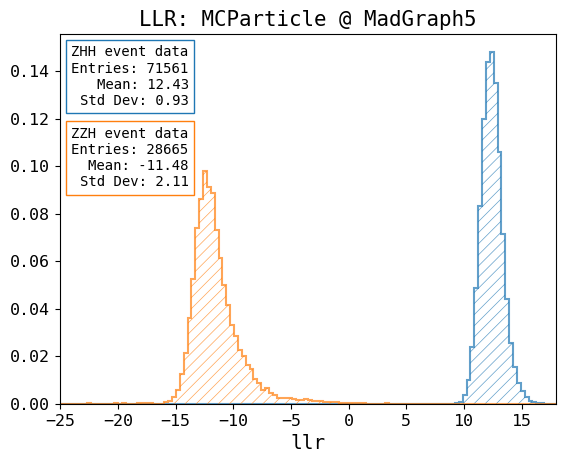

KeyError: 'llr'

In [12]:
from analysis.plot_routines import plot_llr
plot_llr(mcp, "MCParticle @ Physsim", llr_column='llr')

In [5]:
data = mcp[mcp["is_zhh"] == 1]
#a_raw = np.sqrt(data["jet1_e"]**2 - ( data["jet1_px"]**2 + data["jet1_py"]**2 + data["jet1_pz"]**2))
a_raw = np.sqrt(( data["parton1_px"]**2 + data["parton1_py"]**2 + data["parton1_pz"]**2))
a = a_raw[~a_raw.isna()]

In [6]:
np.average(a[(a > 0)])

85.258514

<Axes: ylabel='Count'>

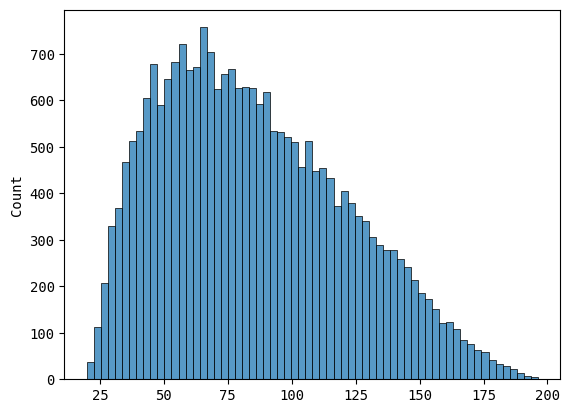

In [7]:
sns.histplot(a[(a > 0)], bins=64)

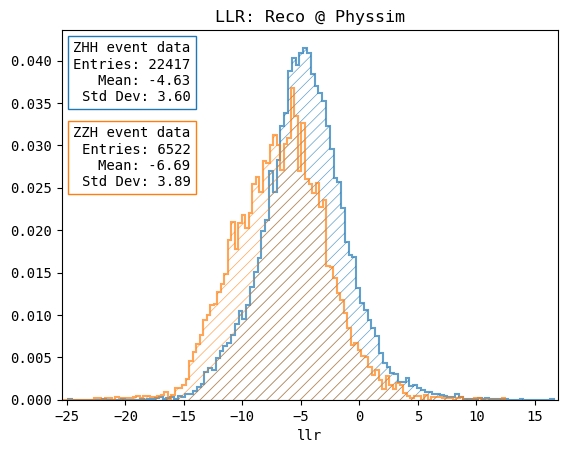

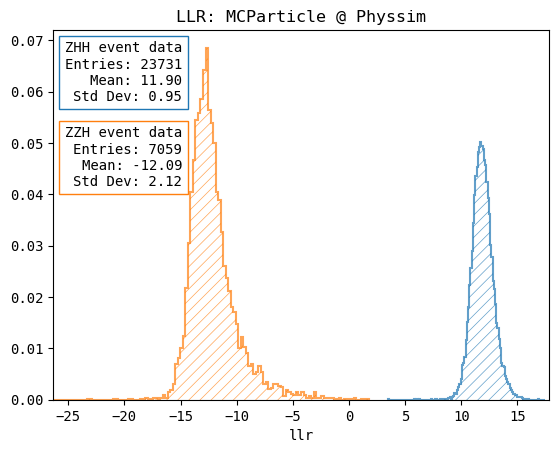

In [10]:
plot_llr(reco, "Reco @ Physsim")
plot_llr(mcp, "MCParticle @ Physsim")

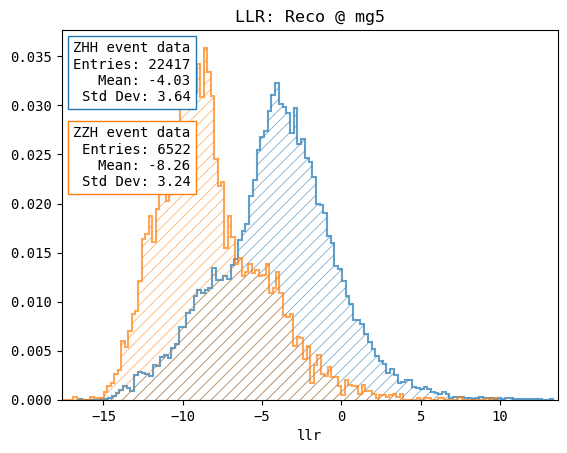

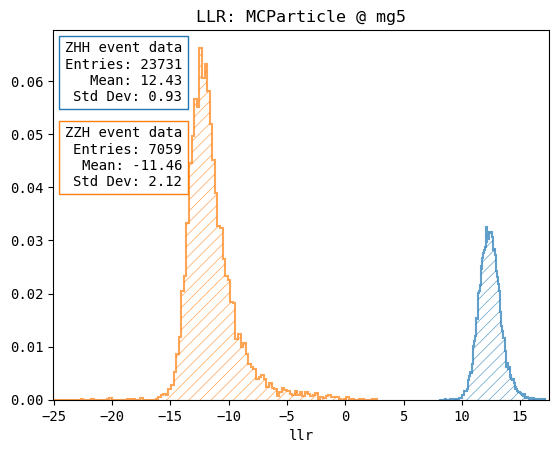

In [7]:
plot_llr(reco, "Reco @ mg5", llr_column='llr_mg5')
plot_llr(mcp, "MCParticle @ mg5", llr_column='llr_mg5')

In [33]:
np.average(data["llr_mg5"]/data["llr"])

1.0

In [8]:
mcp_raw.keys()

Index(['run', 'event', 'error_code', 'is_zhh', 'is_zzh', 'passed_preselection',
       'true_h1_decay_pdg', 'true_h2_decay_pdg', 'true_z2_decay_pdg',
       'parton1_pdg',
       ...
       'zzh_phi', 'zzh_phiz', 'zzh_phiz1f', 'zzh_phiz2f', 'zzh_costheta',
       'zzh_costhetaz', 'zzh_costhetaz1f', 'zzh_costhetaz2f', 'zzh_sigmalr',
       'true_type'],
      dtype='object', length=102)

In [8]:
data["reco"].shape

(29249, 112)

In [9]:
from analysis.energy_transfer import plot_jet_energy_transfer_from_df, plot_energy_transfer

Jet Energy Transfer

In [84]:
import matplotlib.pyplot as plt
import logging
logger = logging.getLogger('mem_hep')

from analysis.import_data import import_data, filter_data
from analysis.plot_matplotlib import plot_hist
from math import sqrt, pow, pi, exp
from typing import Optional
from os import path as osp
from os import makedirs, remove
import numpy as np

fit_funcs = {
    "laplace": lambda x, mu, sigma:
        1/(2*sigma)*np.exp(-np.abs(x-mu)/sigma),
        
    "lorentz": lambda x, x0, gamma:
            1/(pi*gamma*(1 + ( (x-x0)/gamma )**2 )),
        
    "gauss": lambda x, x0, sigma:
        1/(sqrt(2*pi)*sigma)*np.exp(-(x-x0)**2/(2*sigma**2)),
    
    "dbgauss_old": lambda x, x0, sigma, a2, x02, sigma2:
        1/(sqrt(2*pi)*sigma)*(np.exp(-(x-x0)**2/(2*sigma**2)) + (a2**2)*np.exp(-(x-x02)**2/(2*sigma2**2)))
}

def plot_transfer(data, name, plot_save_dir:Optional[str] = None, fit = "gauss", true_label = "parton", reco_label = "jet", quantity="E", xlabel=r"$ΔE$ [GeV]", xlim=(-100,100), ylim=(0, 0.18), n_bins=128, binrange=None):
    from scipy.optimize import curve_fit,minimize
    
    fig, axes = plt.subplots(1, len(data), figsize=(6*len(data),8))
    fig.suptitle(name + r": $" + quantity + r"_{" + reco_label + r"}-" + quantity +  r"_{" + true_label + r"}$", fontsize=18)
    
    for i in range(1,1+len(data)):
        df = data[i-1]
        
        def dbgauss_construct(E_p, E_j):
            def dbgauss(a1, a2, a4, a5, b1, b2, b3, b4, b5):
                p1 = a1 + E_p*b1
                p2 = a2 + E_p*b2
                p3 =      E_p*b3
                p4 = a4 + E_p*b4
                p5 = a5 + E_p*b5
                
                return (1/(sqrt(2*pi)*(p2+p3*p5)))*(np.exp(-((E_j-E_p)-p1)**2/(2*p2**2)) + p3*np.exp(-((E_j-E_p) - p4)**2/(2*p5**2)))
            
            return dbgauss
        
        def dbgauss_likelihood(E_p, E_j):
            dbgauss = dbgauss_construct(E_p, E_j)
            def likelihood(a1, a2, a4, a5, b1, b2, b3, b4, b5):
                return np.sum(np.log(dbgauss(a1, a2, a4, a5, b1, b2, b3, b4, b5)))
        
        popt = None
        pcov = None
        
        if fit == "dbgauss":
            # Unbinned likelihood fit
            minimize(dbgauss_likelihood())
        else:
            # Binned fit
            df = df[0] - df[1]
            
            fit_inits = {
                "laplace": [np.average(df), 5],
                "lorentz": [np.average(df), 2],
                "gauss": [np.average(df), np.std(df)],
                "dbgauss_old": [0, np.std(df), 0.2, 0, 2*np.std(df)]
            }
            
            fit_func = fit_funcs[fit]
            fit_init = fit_inits[fit]
            
            y, bins = np.histogram(df, bins=n_bins, density=True, range=binrange)
            x = (bins[:-1] + bins[1:]) / 2
        
            popt, pcov = curve_fit(fit_func, x, y, p0 = fit_init, maxfev = 8000)
        
            print(popt)

        plot_hist(df, f"{reco_label.title()} {i}", fit_func=lambda x: fit_func(x, *popt), fit_opts=popt, bins=n_bins, xlim=xlim, ylim=ylim, ax=axes[i-1], xlabel=xlabel, title=f"{reco_label.title()} {i}", normalize=True, yscale="linear", text_spacing_y=0.15)
        #sns.histplot(data["jet{}_e".format(i)] - data["parton{}_e".format(i)], bins=128, ax=axes[i-1]).set_title("Jet {}".format(i))

def plot_transfer_from_df(data, name = "", plot_save_dir:Optional[str] = None, fit = "gauss"):
    df = []
    for i in range(1, 5):
        df.append((data[f"jet{i}_e"], data[f"parton{i}_e"]))
    
    plot_transfer(df, name, plot_save_dir=plot_save_dir, fit=fit)

[-0.99692351  6.14668433]
[-1.02718438  6.27770407]
[-1.38580004  6.52747822]
[-1.20268923  6.42380481]


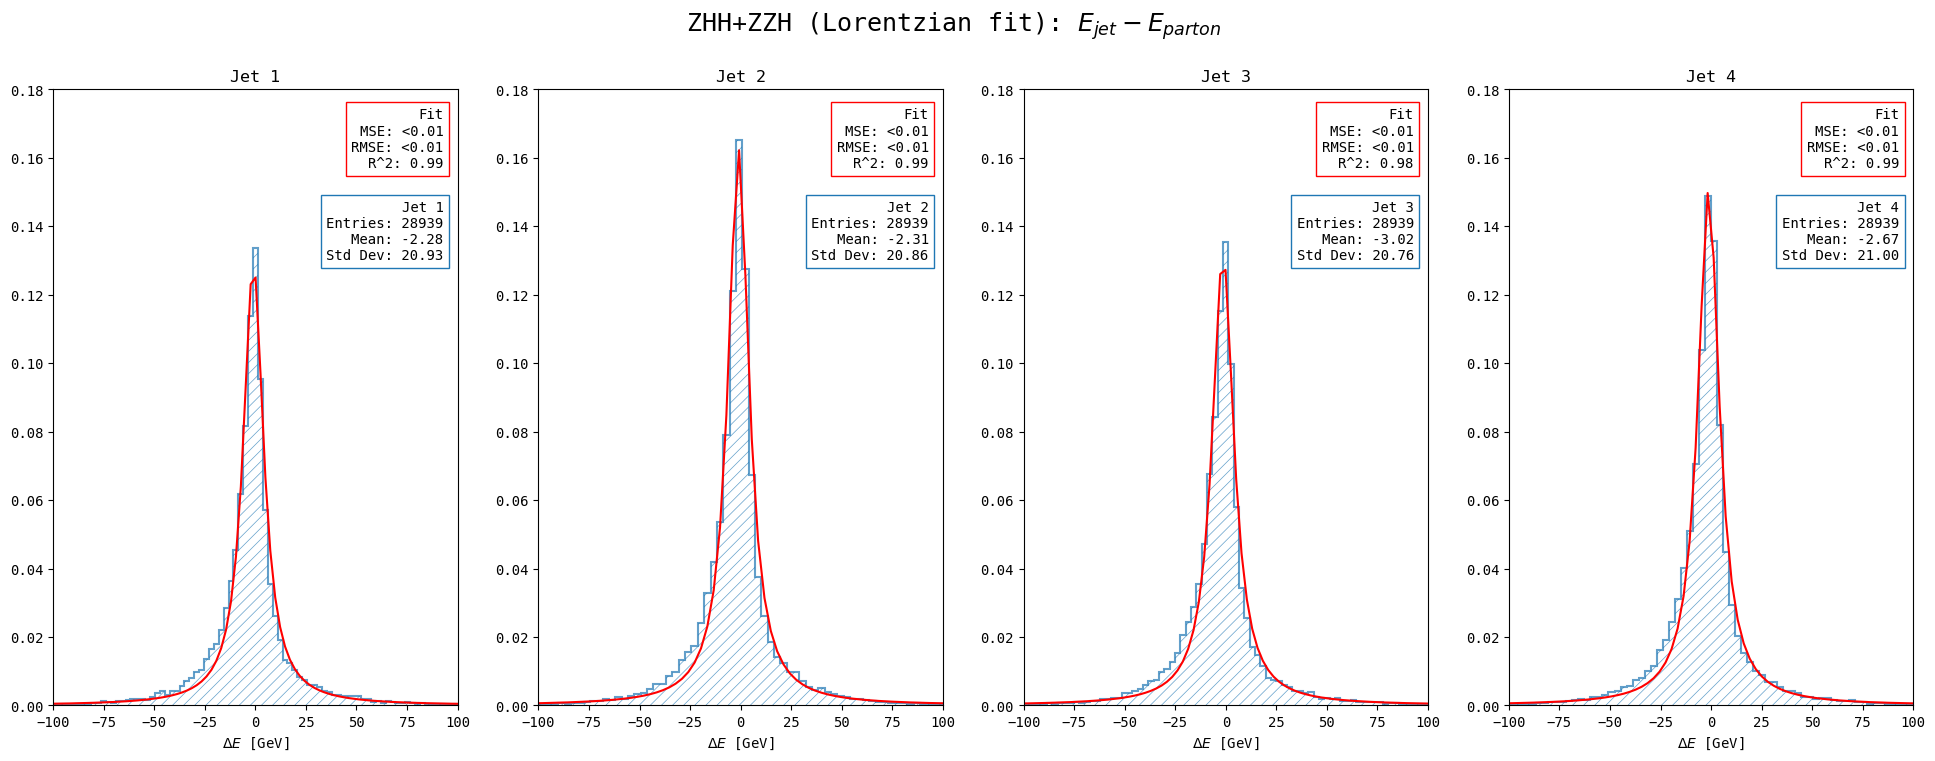

In [72]:
plot_transfer_from_df(reco, "ZHH+ZZH (Lorentzian fit)", fit="lorentz")

In [27]:
# Check normalization of dbgauss
from scipy.integrate import quad

#E_p = np.array([1]*5)
#E_j = np.array([0]*5)
p_test = [1]*9

def dbgauss_construct(E_p, E_j):
    def dbgauss(a1, a2, a4, a5, b1, b2, b3, b4, b5):
        p1 = a1 + E_p*b1
        p2 = a2 + E_p*b2
        p3 =      E_p*b3
        p4 = a4 + E_p*b4
        p5 = a5 + E_p*b5
        
        return (1/(sqrt(2*pi)*(p2+p3*p5)))*(np.exp(-((E_j-E_p)-p1)**2/(2*p2**2)) + p3*np.exp(-((E_j-E_p) - p4)**2/(2*p5**2)))
    
    return dbgauss

def dbgauss_test(E_p):
    return dbgauss_construct(E_p, 3000)(*p_test)

#dbgauss_test(1)
quad(dbgauss_test, -500000, 500000)

(0.6386920728227685, 1.075138596520517e-09)

In [ ]:
"lorentz": lambda x, x0, gamma:
                     1/(pi*gamma*(1 + ( (x-x0)/gamma )**2 ))

In [37]:
# Check normalization of lorentz
from scipy.integrate import quad

def lorentz(x, x0, gamma):
    #return G/((2*pi)*((x-x0)**2 + ((G**2)/4)))
    return 1/(pi*gamma*(1 + ( (x-x0)/gamma )**2 ))

def lorentz_fit(x):
    popt = [-1.33850763,  6.35057887]
    return bw(x, *popt)

quad(lorentz_fit, -500000, 500000)

(0.9999919141918524, 8.87321588513478e-09)

[-1.33850763  6.35057887]
[-1.36678223  6.4788703 ]
[-1.42685018  6.48213426]
[-1.20858859  6.40604084]


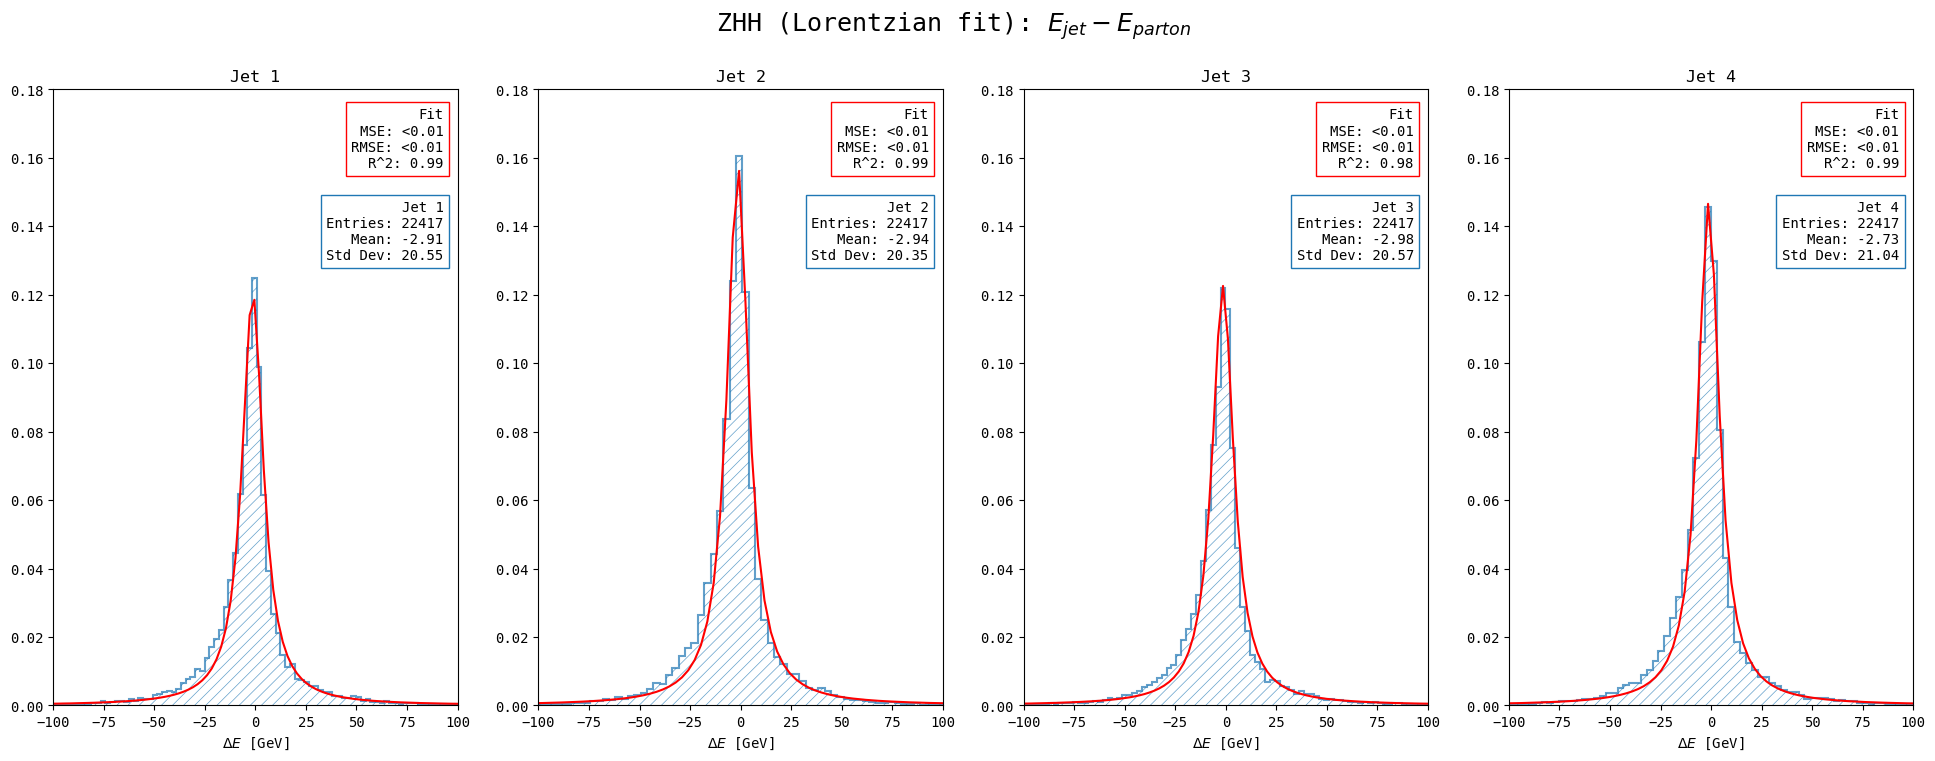

In [7]:
plot_transfer_from_df(reco[reco["is_zhh"] == 1], "ZHH (Lorentzian fit)", fit="lorentz")

[-0.21426421  5.4111742 ]
[-0.07810281  5.41453075]
[-1.3032832   6.58035589]
[-1.23814498  6.50253684]


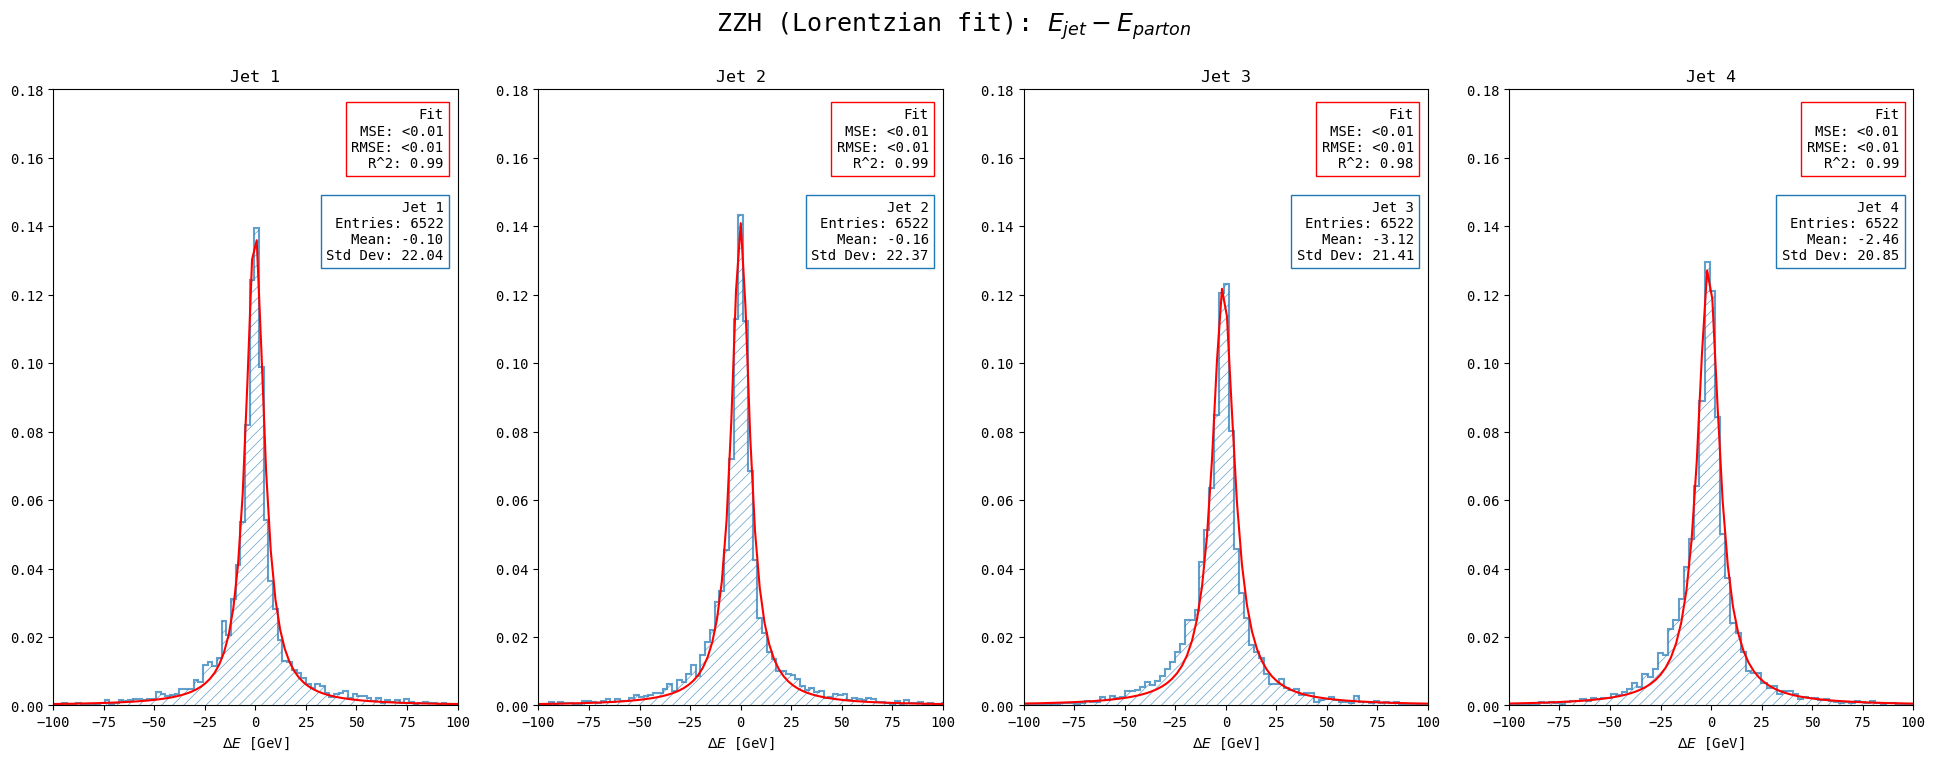

In [8]:
plot_transfer_from_df(reco[reco["is_zzh"] == 1], "ZZH (Lorentzian fit)", fit="lorentz")

pT

[-2.02830254  4.35893197]
[-2.02413195  4.53581626]
[-2.34425106  4.72286748]
[-2.24864263  4.60622201]


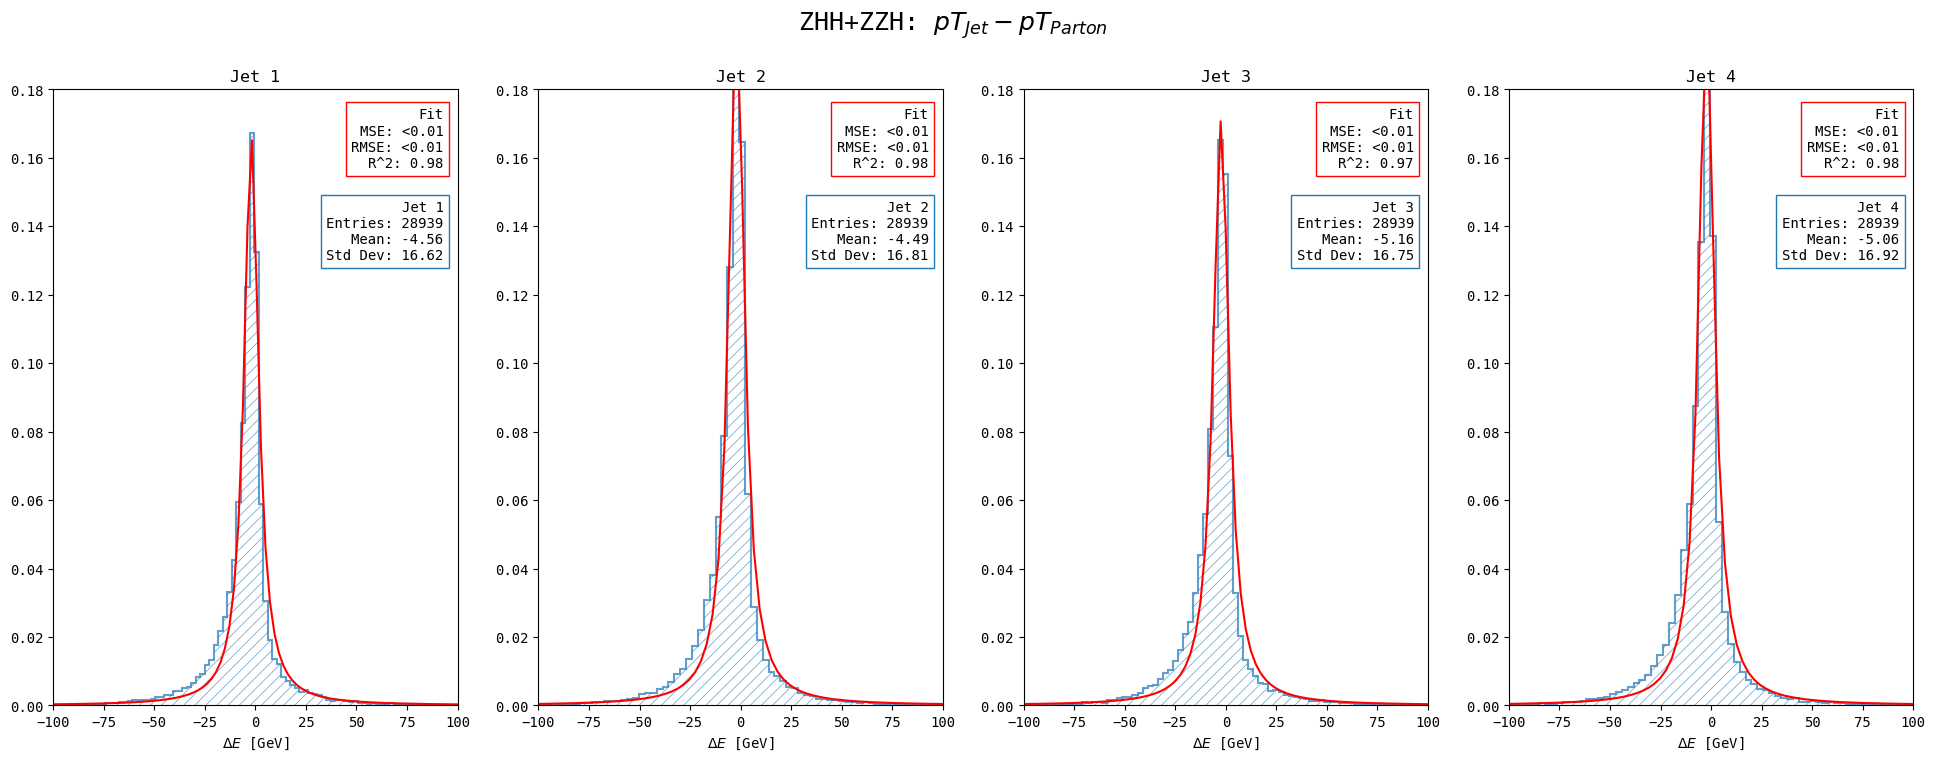

In [62]:
df = []
for i in range(1, 5):
    df.append((
        np.sqrt(reco["jet{}_px".format(i)]**2 + reco["jet{}_py".format(i)] ** 2),
        np.sqrt(reco["parton{}_px".format(i)]**2 + reco["parton{}_py".format(i)] ** 2)
    ))

plot_transfer(df, name="ZHH+ZZH", fit="lorentz", true_label="Parton", reco_label="Jet", quantity="pT")

Muon energies + angles

/nfs/dust/ilc/user/bliewert/.mambaforge/envs/py311/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[-7.59249437e-02  2.52811606e+00  2.64293354e+00 -1.63621573e+04
 -2.19986040e+02]
[-2.42676769e-01  2.44946421e+00  2.12708549e+01 -1.47244463e+04
  9.04805246e+01]


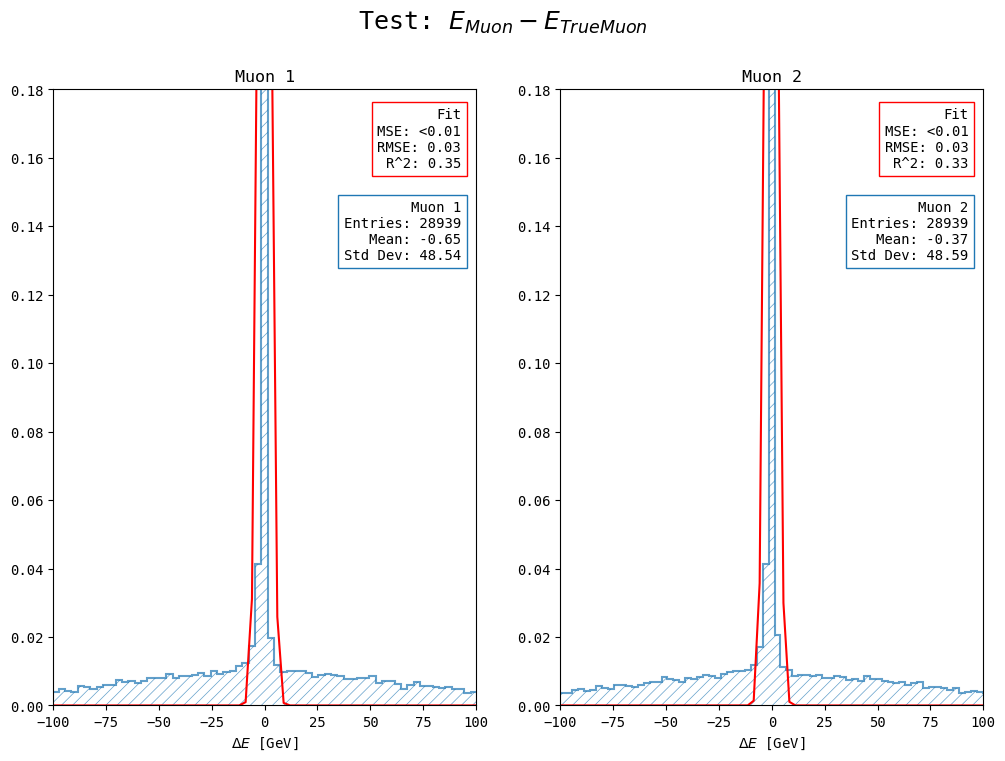

In [39]:
df = []
for i in range(1, 3):
    df.append((reco[f"lep{i}_e"], reco[f"true_lep{i}_e"]))

plot_transfer(df, "Test", fit="dbgauss_old", true_label="True Muon", reco_label="Muon")

Jet Angular Transfer

Theta

In [40]:
data = reco

In [154]:
df = []

for i in range(1, 5):
    theta = {}
    phi = {}
    for ptype in ["jet", "parton"]:
        theta[ptype] = np.arccos(data[f"{ptype}{i}_pz"] / np.sqrt(data[f"{ptype}{i}_px"]**2 + data[f"{ptype}{i}_py"]**2 + data[f"{ptype}{i}_pz"]**2))
        phi[ptype] = np.arctan2(data[f"{ptype}{i}_py"], data[f"{ptype}{i}_px"])
    
    #theta = acos(z/sqrt(x**2 + y**2 + z**2))
    #phi = atan2(y, x)
    
    df.append((theta, phi))

Theta

[-0.00024655  0.02974795]
[0.00012982 0.03055841]
[0.00050487 0.02955888]
[-0.00018792  0.02993235]


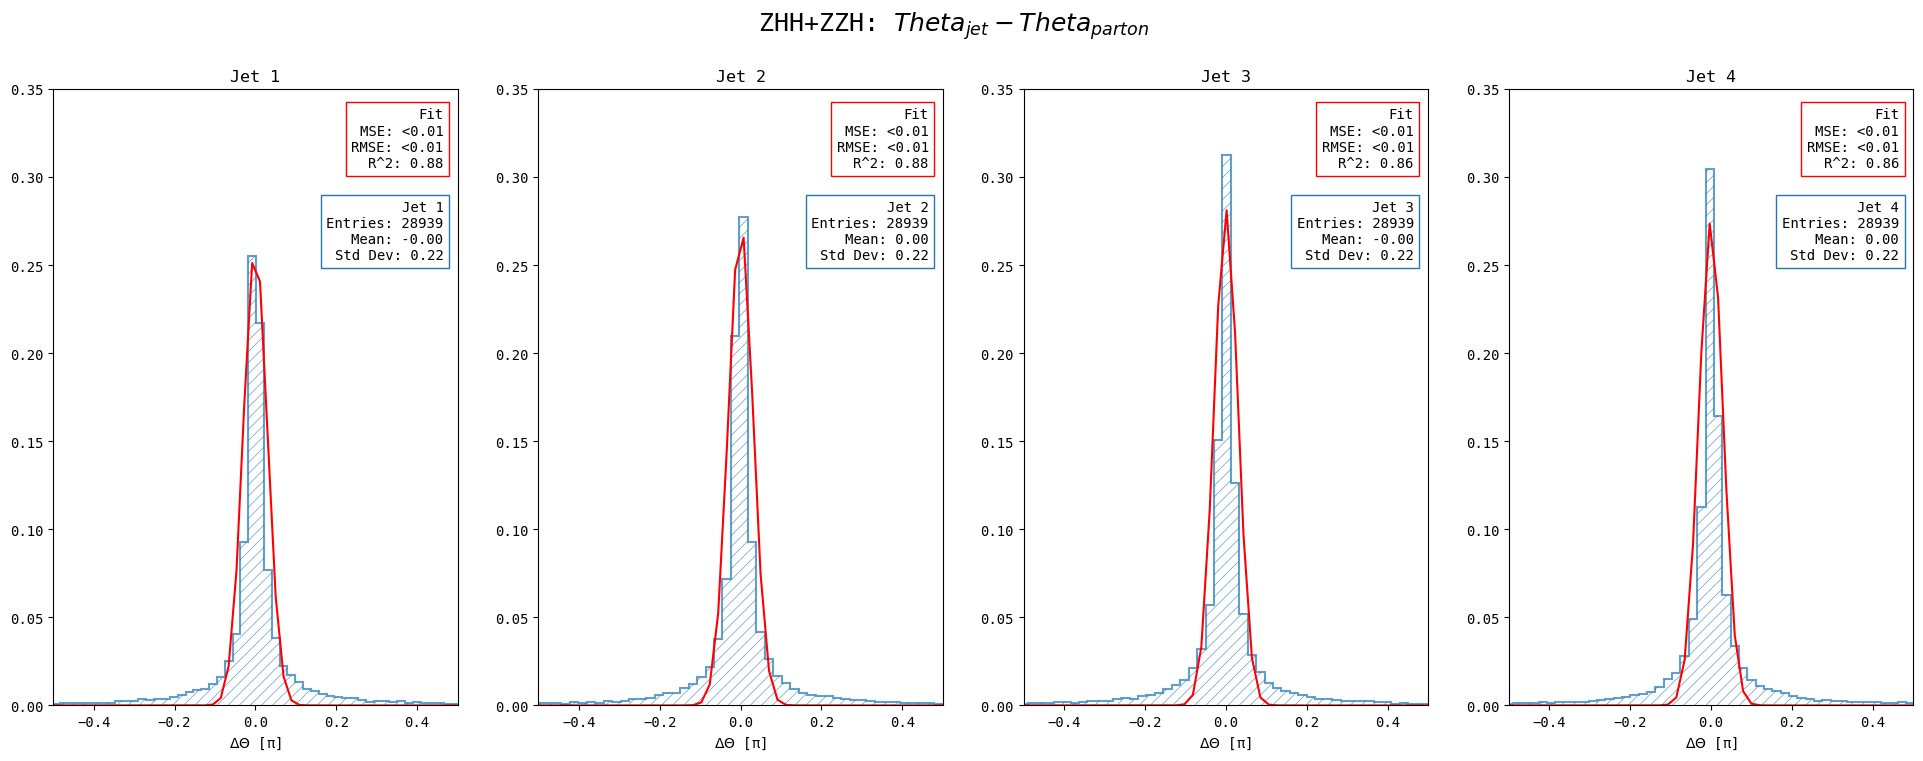

In [160]:
dg = []
for i in range(4):
    dg.append((df[i][0]["jet"], df[i][0]["parton"]))

plot_transfer(dg, "ZHH+ZZH", fit="gauss", quantity="Theta", xlabel=r"$\Delta\Theta$ [π]", xlim=(-0.5,0.5), ylim=(0,0.35), n_bins=256)

[-3.19965752e-05  2.23818931e-02]
[-0.00017141  0.0223692 ]
[-0.00055119  0.02249269]
[-0.00025691  0.02227649]


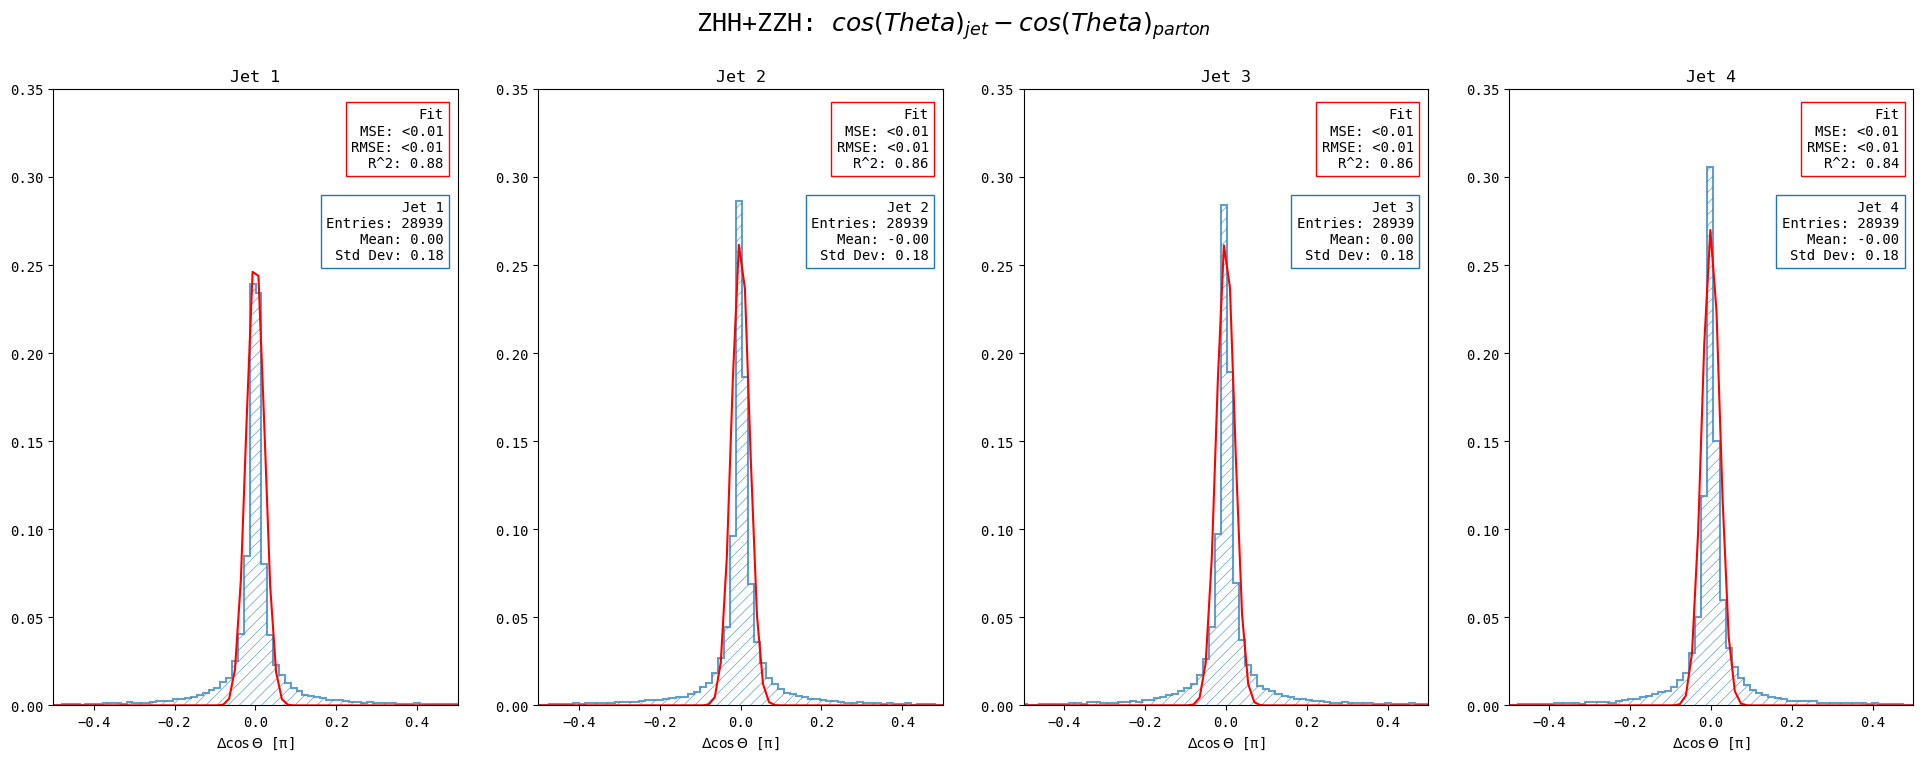

In [167]:
dg = []
for i in range(4):
    dg.append((np.cos(df[i][0]["jet"]), np.cos(df[i][0]["parton"])))

plot_transfer(dg, "ZHH+ZZH", fit="gauss", quantity="cos(Theta)", xlabel=r"$\Delta\cos{\Theta}$ [π]", xlim=(-0.5,0.5), ylim=(0,0.35), n_bins=256)

Phi

[0.00143585 0.0504845 ]
[0.00080653 0.05051266]
[-0.00039819  0.04996996]
[-0.00059345  0.05101729]


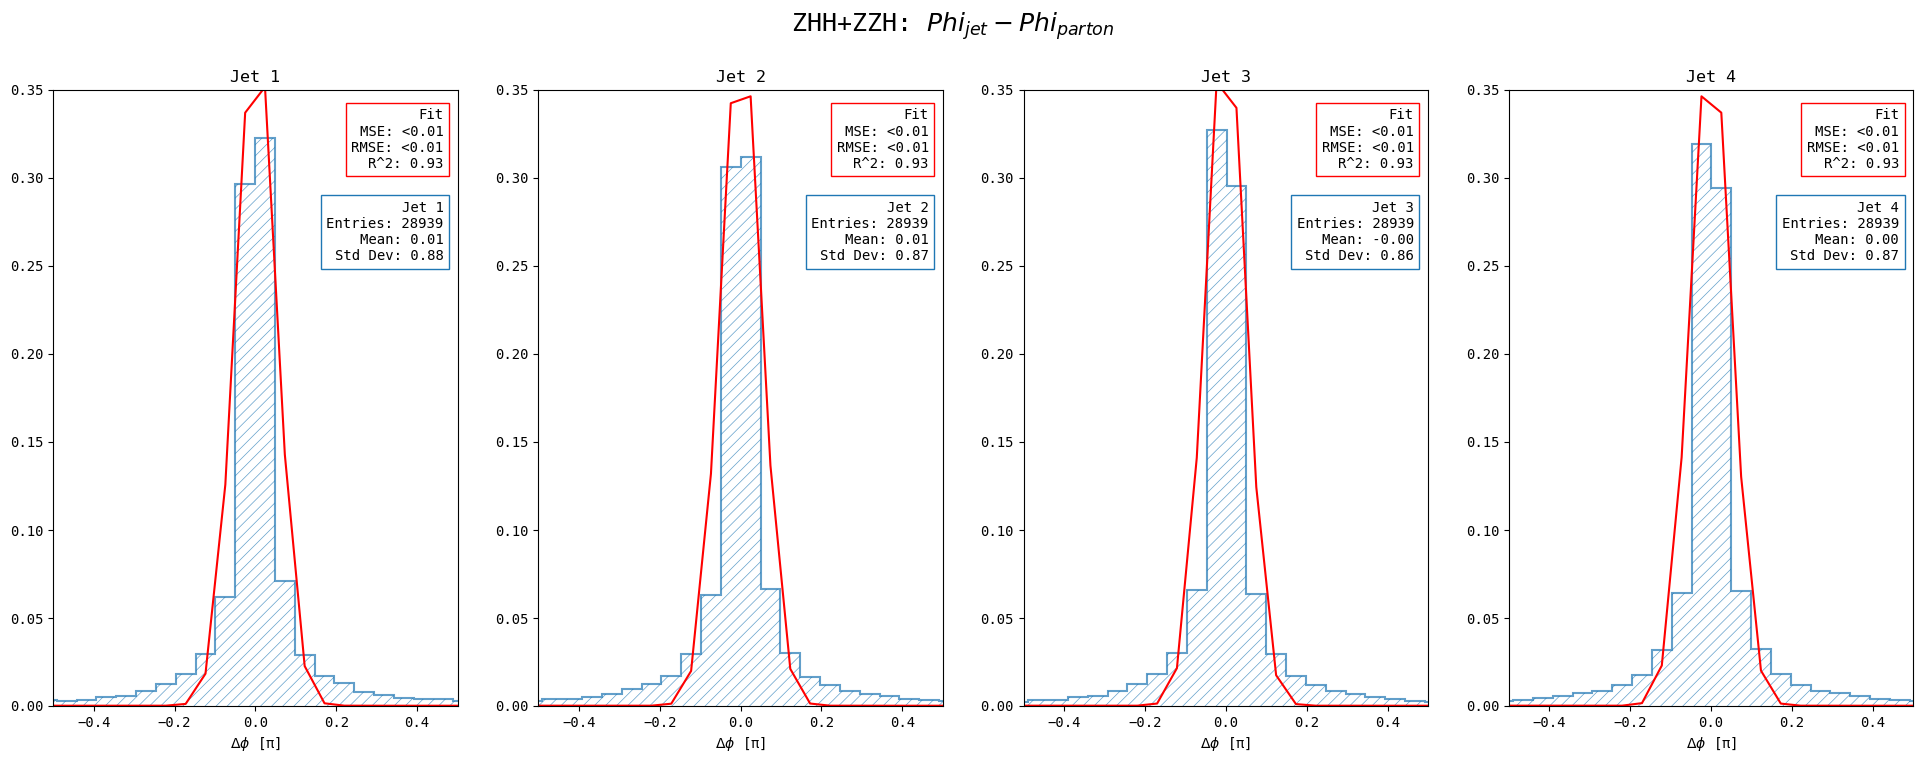

In [166]:
dg = []
for i in range(4):
    dg.append((df[i][1]["jet"], df[i][1]["parton"]))

plot_transfer(dg, "ZHH+ZZH", fit="gauss", quantity="Phi", xlabel=r"$\Delta\phi$ [π]", xlim=(-0.5,0.5), ylim=(0,0.35), n_bins=256)

[0.00078317 0.02199607]
[0.00059999 0.02076936]
[0.00016838 0.0201623 ]
[-0.00045808  0.02265684]


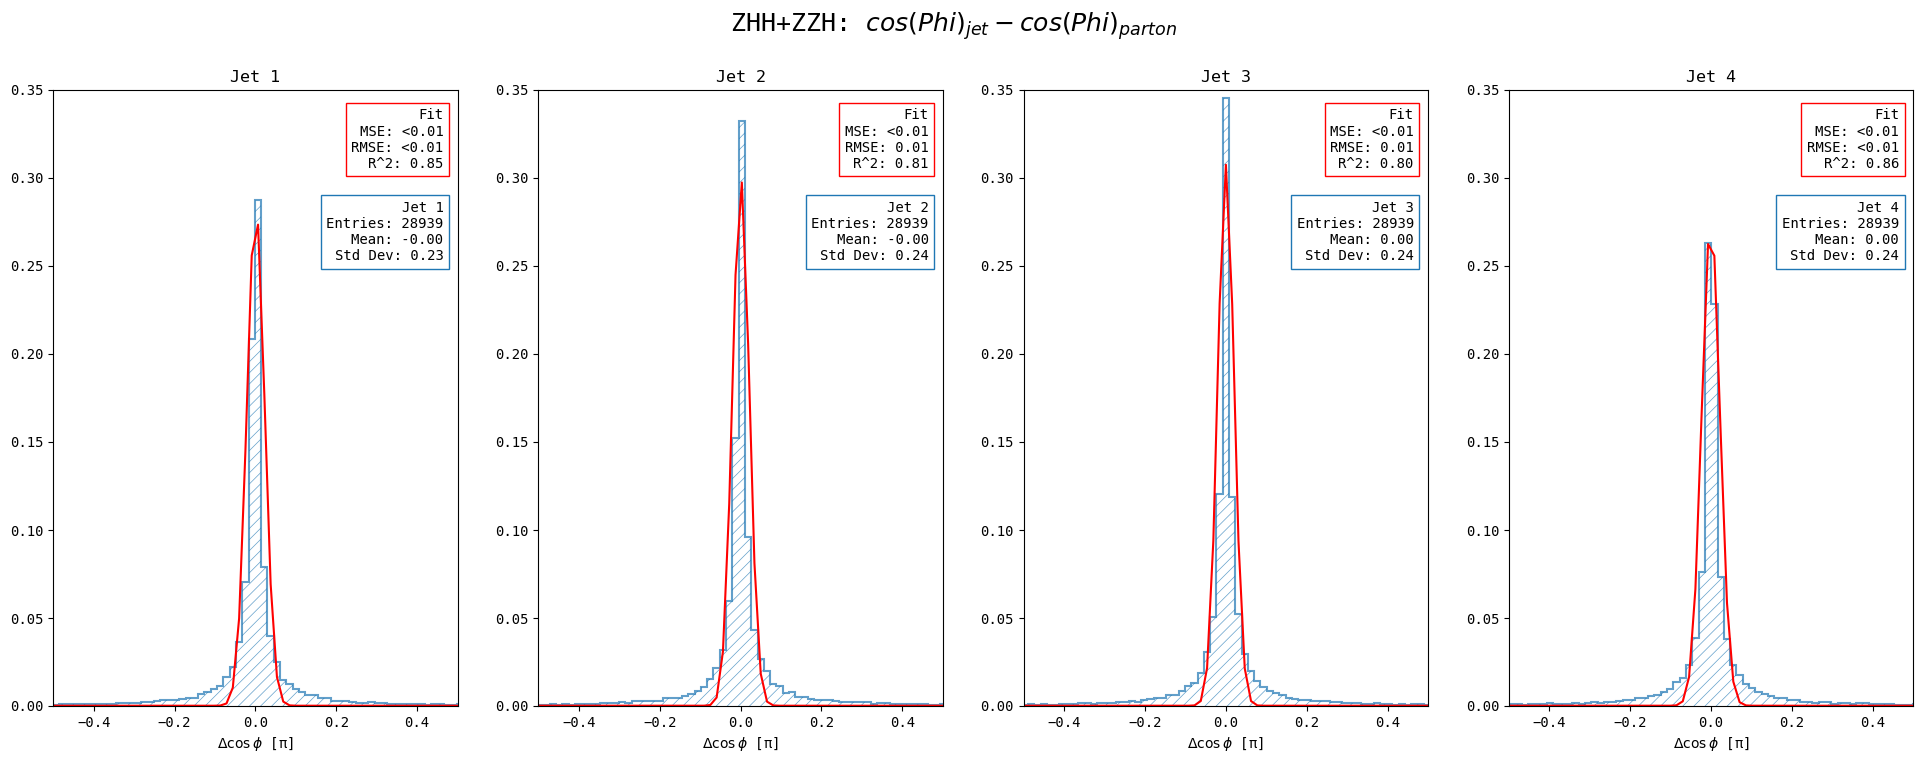

In [165]:
dg = []
for i in range(4):
    dg.append((np.cos(df[i][1]["jet"]), np.cos(df[i][1]["parton"])))

plot_transfer(dg, "ZHH+ZZH", fit="gauss", quantity="cos(Phi)", xlabel=r"$\Delta\cos{\phi}$ [π]", xlim=(-0.5,0.5), ylim=(0,0.35), n_bins=256)

Testing

In [90]:
import scipy as sp
import numpy as np
from typing import Dict
from math import sqrt,sin,cos,atan2,acos
from scipy.optimize import least_squares


def get_angles(x, y, z):
    theta = acos(z/sqrt(x**2 + y**2 + z**2))
    phi = atan2(y, x)
    
    return (theta, phi)

def unit_vec(theta, phi):
    return [
        sin(theta)*cos(phi),
        sin(theta)*sin(phi),
        cos(theta)
    ]
    
def axis_vec(axis = 0) -> list[int]:
    return [
        1 if axis == 0 else 0,
        1 if axis == 1 else 0,
        1 if axis == 2 else 0
    ]
    
def get_kinematics_tf(data, idx:int, mode:int = 1, order = ["1", "2", "1", "2", "3", "4"]):
    """_summary_

    Args:
        data (_type_): event data
        idx (int): _description_
        mode (int, optional): 1 = Reco (default); 0 = MC Truth

    Returns:
        _type_: _description_
    """
    p = "jet" if mode == 1 else "parton"
    l = "lep" if mode == 1 else "true_lep"
    
    angles = np.array([
        get_angles(data[f"{l}{order[0]}_px"][idx], data[f"{l}{order[0]}_py"][idx], data[f"{l}{order[0]}_pz"][idx]),
        get_angles(data[f"{l}{order[1]}_px"][idx], data[f"{l}{order[1]}_py"][idx], data[f"{l}{order[1]}_pz"][idx]),
        get_angles(data[f"{p}{order[2]}_px"][idx], data[f"{p}{order[2]}_py"][idx], data[f"{p}{order[2]}_pz"][idx]),
        get_angles(data[f"{p}{order[3]}_px"][idx], data[f"{p}{order[3]}_py"][idx], data[f"{p}{order[3]}_pz"][idx]),
        get_angles(data[f"{p}{order[4]}_px"][idx], data[f"{p}{order[4]}_py"][idx], data[f"{p}{order[4]}_pz"][idx]),
        get_angles(data[f"{p}{order[5]}_px"][idx], data[f"{p}{order[5]}_py"][idx], data[f"{p}{order[5]}_pz"][idx])
    ])
    
    energies = np.array([
        data[f"{l}{order[0]}_e"][idx],
        data[f"{l}{order[1]}_e"][idx],
        data[f"{p}{order[2]}_e"][idx],
        data[f"{p}{order[3]}_e"][idx],
        data[f"{p}{order[4]}_e"][idx],
        data[f"{p}{order[5]}_e"][idx]
    ])
    
    momenta = np.array([
        sqrt(data[f"{l}{order[0]}_px"][idx]**2 + data[f"{l}{order[0]}_py"][idx]**2 + data[f"{l}{order[0]}_pz"][idx]**2),
        sqrt(data[f"{l}{order[1]}_px"][idx]**2 + data[f"{l}{order[1]}_py"][idx]**2 + data[f"{l}{order[1]}_pz"][idx]**2),
        sqrt(data[f"{p}{order[2]}_px"][idx]**2 + data[f"{p}{order[2]}_py"][idx]**2 + data[f"{p}{order[2]}_pz"][idx]**2),
        sqrt(data[f"{p}{order[3]}_px"][idx]**2 + data[f"{p}{order[3]}_py"][idx]**2 + data[f"{p}{order[3]}_pz"][idx]**2),
        sqrt(data[f"{p}{order[4]}_px"][idx]**2 + data[f"{p}{order[4]}_py"][idx]**2 + data[f"{p}{order[4]}_pz"][idx]**2),
        sqrt(data[f"{p}{order[5]}_px"][idx]**2 + data[f"{p}{order[5]}_py"][idx]**2 + data[f"{p}{order[5]}_pz"][idx]**2)        
    ])
    
    return (energies, momenta, angles)

def get_corrections(data, event_idx:int, is_reco:int = 1):
    qties = (
        [],
        [],
        []
    )
    for i, qty in enumerate(["px", "py", "pz"]):
        for part in (["lep1", "lep2", "jet1", "jet2", "jet3", "jet4"] if is_reco else ["true_lep1", "true_lep2", "parton1", "parton2", "parton3", "parton4"]):
            qties[i].append(reco[f"{part}_{qty}"][event_idx])
            
    return {
        "sqrt_s": reco["true_lep1_e"][event_idx] + reco["true_lep2_e"][event_idx] + reco["parton1_e"][event_idx] + reco["parton2_e"][event_idx] + reco["parton3_e"][event_idx] + reco["parton4_e"][event_idx],
        "system_px": np.sum(qties[0]),
        "system_py": np.sum(qties[1]),
        "system_pz": np.sum(qties[2]),
    }

def get_parton_energies(data, event_idx):
    return [
        data["parton1_e"][event_idx],
        data["parton2_e"][event_idx],
        data["parton3_e"][event_idx],
        data["parton4_e"][event_idx]
    ]
    
def get_parton_momenta(data, event_idx):
    p = "parton"
    return np.array([
        sqrt(data[f"{p}1_px"][event_idx]**2 + data[f"{p}1_py"][event_idx]**2 + data[f"{p}1_pz"][event_idx]**2),
        sqrt(data[f"{p}2_px"][event_idx]**2 + data[f"{p}2_py"][event_idx]**2 + data[f"{p}2_pz"][event_idx]**2),
        sqrt(data[f"{p}3_px"][event_idx]**2 + data[f"{p}3_py"][event_idx]**2 + data[f"{p}3_pz"][event_idx]**2),
        sqrt(data[f"{p}4_px"][event_idx]**2 + data[f"{p}4_py"][event_idx]**2 + data[f"{p}4_pz"][event_idx]**2)    
    ])

In [86]:
constants = {
    "m_b": 4.799957253499145, # truth MC: 4.8(?); wikipedia: 4.18
    "m_H": 125.,
    "m_Z": 91.19,
    "m_mu": 0.1056357046473643, # from average over all truth MC muon/anti-muons; wikipedia: 0.105658
    "sqrt_s": 500.,
    "sigma_sig_tot": 1., # calculated with MadGraph5 for ZHH
    "sigma_bkg_tot": 1., # calculated with MadGraph5 for ZZH
}

def construct_func(kinematics, constants:dict[str, float], corrections:dict = {}, hypothesis:int = 1,):
    """
    
    Args:
        kinematics (_type_): tupel with 3 entries: Emu1, Emu2, angles, where angles contains 12 angles in the order (theta, phi) for all particles; 0-1: mu-, 2-3: mu+, 4-5: b1, 6-7: bbar1, etc.
        constants (dict[str, float]): 
        corrections (dict): mainly for testing with MC truth data; may contain "sqrt_s", "system_px", "system_py", "system_pz"
        hypothesis (int): 1 for signal, 0 for background  (not used yet)
    """
    
    energies, momenta, angles = kinematics
    
    Emu1, Emu2 = energies[0], energies[1]
    
    m_b       = constants["m_b"]
    m_mu      = constants["m_mu"]
    sqrt_s    = corrections["sqrt_s"] if "sqrt_s" in corrections else constants["sqrt_s"]
    system_px = corrections["system_px"] if "system_px" in corrections else 0
    system_py = corrections["system_py"] if "system_py" in corrections else 0
    system_pz = corrections["system_pz"] if "system_pz" in corrections else 0
    
    if Emu1 < m_mu or Emu2 < m_mu:
        return None 
    
    # construct angle vectors
    e_m1   = unit_vec(angles[0][0], angles[0][1])
    e_m2   = unit_vec(angles[1][0], angles[1][1])
    e_mb11 = unit_vec(angles[2][0], angles[2][1])
    e_mb12 = unit_vec(angles[3][0], angles[3][1])
    e_mb21 = unit_vec(angles[4][0], angles[4][1])
    e_mb22 = unit_vec(angles[5][0], angles[5][1])
    
    #dot_b11_b12 = np.dot(e_mb11, e_mb12)
    #dot_b21_b22 = np.dot(e_mb21, e_mb22)
    
    e_x = axis_vec(0)
    e_y = axis_vec(1)
    e_z = axis_vec(2)
    
    # construct projections
    proj = []
    for e_axis in [e_x, e_y, e_z]:
        cproj = []
        for e_part in [e_m1, e_m2, e_mb11, e_mb12, e_mb21, e_mb22]:
            cproj.append(np.dot(e_axis, e_part))
            
        proj.append(cproj)

    def func1(x):
        # x[0]: E_b1
        # x[1]: E_bbar1
        # x[2]: E_b2
        # x[3]: E_bbar2
        
        for i in range(4):
            if x[i] < m_b:
                print(f"Parton {i}: {x[i]} < {m_b}")
        
        return [
            -sqrt_s + Emu1 + Emu2 + x[0] + x[1] + x[2] + x[3],
            
            #(m_B1**2-2*m_b)/2 - x[2]*x[3] * (1 - sqrt(x[2]**2 - m_b**2)*sqrt(x[3]**2 - m_b**2)/(x[2]*x[3])) * dot_b11_b12,
            #(m_B2**2-2*m_b)/2 - x[4]*x[5] * (1 - sqrt(x[4]**2 - m_b**2)*sqrt(x[5]**2 - m_b**2)/(x[4]*x[5])) * dot_b11_b12,
            
            -system_px + sqrt(Emu1**2 - m_mu**2)*proj[0][0] + sqrt(Emu2**2 - m_mu**2)*proj[0][1] + sqrt(x[0]**2 - m_b**2)*proj[0][2] + sqrt(x[1]**2 - m_b**2)*proj[0][3] + sqrt(x[2]**2 - m_b**2)*proj[0][4]+ sqrt(x[3]**2 - m_b**2)*proj[0][5],
            -system_py + sqrt(Emu1**2 - m_mu**2)*proj[1][0] + sqrt(Emu2**2 - m_mu**2)*proj[1][1] + sqrt(x[0]**2 - m_b**2)*proj[1][2] + sqrt(x[1]**2 - m_b**2)*proj[1][3] + sqrt(x[2]**2 - m_b**2)*proj[1][4]+ sqrt(x[3]**2 - m_b**2)*proj[1][5],
            -system_pz + sqrt(Emu1**2 - m_mu**2)*proj[2][0] + sqrt(Emu2**2 - m_mu**2)*proj[2][1] + sqrt(x[0]**2 - m_b**2)*proj[2][2] + sqrt(x[1]**2 - m_b**2)*proj[2][3] + sqrt(x[2]**2 - m_b**2)*proj[2][4]+ sqrt(x[3]**2 - m_b**2)*proj[2][5],
            
            #Emu1*sin[Tm1]*Cos[Pm1] + Em2*Sin[Tm2]*Cos[Pm2] + Sqrt[Eb11^2 - mb^2]*Sin[Tb11]*Cos[Pb11] + Sqrt[Eb12^2 - mb^2]*Sin[Tb12]*Cos[Pb12] + Sqrt[Eb21^2 - mb^2]*Sin[Tb21]*Cos[Pb21] + Sqrt[Eb22^2 - mb^2]*Sin[Tb22]*Cos[Pb22] &&
            #Emu1*sinTm1]*Sin[Pm1] + Em2*Sin[Tm2]*Sin[Pm2] + Sqrt[Eb11^2 - mb^2]*Sin[Tb11]*Sin[Pb11] + Sqrt[Eb12^2 - mb^2]*Sin[Tb12]*Sin[Pb12] + Sqrt[Eb21^2 - mb^2]*Sin[Tb21]*Sin[Pb21] + Sqrt[Eb22^2 - mb^2]*Sin[Tb22]*Sin[Pb22] &&
            #Emu1*cos(Tm1] + Em2*Cos[Tm2] + Sqrt[Eb11^2 - mb^2]*Cos[Tb11] + Sqrt[Eb12^2 - mb^2]*Cos[Tb12] + Sqrt[Eb21^2 - mb^2]*Cos[Tb21] + Sqrt[Eb22^2 - mb^2]*Cos[Tb22]
        ]
        
    def func2(x):
        # x[0]: E_b1
        # x[1]: E_bbar1
        # x[2]: E_b2
        # x[3]: E_bbar2
        
        return [
            #sqrt_s - Emu1 - Emu2 - sqrt(m_b**2 + x[0]**2) - sqrt(m_b**2 + x[1]**2) - sqrt(m_b**2 + x[2]**2) - sqrt(m_b**2 + x[3]**2),
            - sqrt_s + Emu1 + Emu2 + sqrt(m_b**2 + x[0]**2) + sqrt(m_b**2 + x[1]**2) + sqrt(m_b**2 + x[2]**2) + sqrt(m_b**2 + x[3]**2),
            - system_px + sqrt(Emu1**2 - m_mu**2)*proj[0][0] + sqrt(Emu2**2 - m_mu**2)*proj[0][1] + x[0]*proj[0][2] + x[1]*proj[0][3] + x[2]*proj[0][4]+ x[3]*proj[0][5],
            - system_py + sqrt(Emu1**2 - m_mu**2)*proj[1][0] + sqrt(Emu2**2 - m_mu**2)*proj[1][1] + x[0]*proj[1][2] + x[1]*proj[1][3] + x[2]*proj[1][4]+ x[3]*proj[1][5],
            - system_pz + sqrt(Emu1**2 - m_mu**2)*proj[2][0] + sqrt(Emu2**2 - m_mu**2)*proj[2][1] + x[0]*proj[2][2] + x[1]*proj[2][3] + x[2]*proj[2][4]+ x[3]*proj[2][5],
        ]
    
    return func1, (energies[2], energies[3], energies[4], energies[5])
    #return func2, (momenta[2], momenta[3], momenta[4], momenta[5])

Consistency checks

In [118]:
event_idx = 10
get_corrections(reco, event_idx, 0)

{'sqrt_s': 498.57968,
 'system_px': 3.53133,
 'system_py': 0.08347416,
 'system_pz': -1.0439705}

In [119]:
reco["event"][event_idx]

15043

In [137]:
p_thresh = 0
event_idx = 0
for i in range(1000):
    zhh = calc_zhh(get_kinematics(reco, 0, event_idx))[0]
    zzh = calc_zzh(get_kinematics(reco, 0, event_idx))[0]
    
    if zhh > zzh and zhh > p_thresh:
        p_thresh = zhh
        event_idx = i
        
print(event_idx)

0


In [145]:
event_idx

10

In [144]:
# energies, momenta, angles = kinematics
kin_truth = get_kinematics_tf(reco, event_idx, 0)
kin_reco  = get_kinematics_tf(reco, event_idx, 1, order = [2, 1, 1, 2, 3, 4])

energies = kin_reco[0]
momenta  = kin_reco[1]
angles   = kin_reco[2]
corr     = get_corrections(reco, event_idx, 1)

target, guess = construct_func((energies, momenta, angles), constants, corr) # get_corrections(reco, event_idx)
print("Truth: ", get_parton_energies(reco, event_idx))
print("Guess: ", guess)

res = least_squares(target, guess, bounds = (
    (0, 0, 0, 0),
    (500, 500, 500, 500)
))
print("Result: ", res.x)

Truth:  [140.78964, 30.52705, 108.52039, 36.816433]
Guess:  (142.18433, 31.855255, 114.60277, 31.269955)
Result:  [143.08719009  31.14852217 109.01970526  33.28037961]


In [139]:
kin_reco[0], kin_truth[0]

(array([136.65248 ,  18.630056,  30.442646, 147.50056 ,  80.145805,
         76.35517 ], dtype=float32),
 array([136.98685 ,  18.425348,  33.027374, 158.07144 ,  81.69484 ,
         69.69326 ], dtype=float32))

In [124]:
print(np.array(kin_truth[2]), np.array(kin_reco[2]))

[[ 1.56044444 -3.09039855]
 [ 2.36133852  2.2183346 ]
 [ 0.9750532   0.04492545]
 [ 2.17289143  2.44985594]
 [ 1.73092058 -0.69106257]
 [ 1.54409262  2.70732347]] [[ 1.56045553 -3.09040785]
 [ 2.36136915  2.21812466]
 [ 0.96941868  0.04235893]
 [ 2.19587067  2.36469372]
 [ 1.76346158 -0.73438473]
 [ 1.46699243  2.57851436]]


Check masses

In [12]:
m_mu1 = []
m_mu2 = []
for event_idx in range(10000):
    m_mu1.append(
        sqrt(reco["true_lep1_e"][event_idx]**2 - (
            reco["true_lep1_px"][event_idx]**2 +
            reco["true_lep1_py"][event_idx]**2 +
            reco["true_lep1_pz"][event_idx]**2
        ))
    )
    
    m_mu2.append(
        sqrt(reco["true_lep2_e"][event_idx]**2 - (
            reco["true_lep2_px"][event_idx]**2 +
            reco["true_lep2_py"][event_idx]**2 +
            reco["true_lep2_pz"][event_idx]**2
        ))
    )
m_mu1 = np.array(m_mu1)
m_mu2 = np.array(m_mu2)

In [13]:
(np.average(m_mu1) + np.average(m_mu2))/2

0.1056357046473643

In [14]:
b1_m = []
b2_m = []
b3_m = []
b4_m = []

for i in range(10000):
    b1_mass = sqrt(reco["parton1_e"][event_idx]**2 - (
        reco["parton1_px"][event_idx]**2 +
        reco["parton1_py"][event_idx]**2 +
        reco["parton1_pz"][event_idx]**2
    ))
    
    b2_mass = sqrt(reco["parton2_e"][event_idx]**2 - (
        reco["parton2_px"][event_idx]**2 +
        reco["parton2_py"][event_idx]**2 +
        reco["parton2_pz"][event_idx]**2
    ))
    
    b3_mass = sqrt(reco["parton3_e"][event_idx]**2 - (
        reco["parton3_px"][event_idx]**2 +
        reco["parton3_py"][event_idx]**2 +
        reco["parton3_pz"][event_idx]**2
    ))
    
    b4_mass = sqrt(reco["parton4_e"][event_idx]**2 - (
        reco["parton4_px"][event_idx]**2 +
        reco["parton4_py"][event_idx]**2 +
        reco["parton4_pz"][event_idx]**2
    ))
    
    b1_m.append(b1_mass)
    b2_m.append(b2_mass)
    b3_m.append(b3_mass)
    b4_m.append(b4_mass)
    
    #if not b1_mass == b2_mass:
    #    print((b1_mass, b2_mass))
    
b1_m = np.array(b1_m)
b2_m = np.array(b2_m)
b3_m = np.array(b3_m)
b4_m = np.array(b4_m)

In [15]:
(np.average(b1_m), np.average(b2_m), np.average(b3_m), np.average(b4_m))

(4.799953245086451, 4.799945909454389, 4.7999932048021074, 4.799936654653635)

In [16]:
(np.average(b1_m) + np.average(b2_m) + np.average(b3_m) + np.average(b4_m))/4

4.799957253499145

# ISR(+other effects? valid conservation of four momentum in MC sample?) introduces non-zero pT and longitudinal momentum!

Plots for system px,py,pz momenta

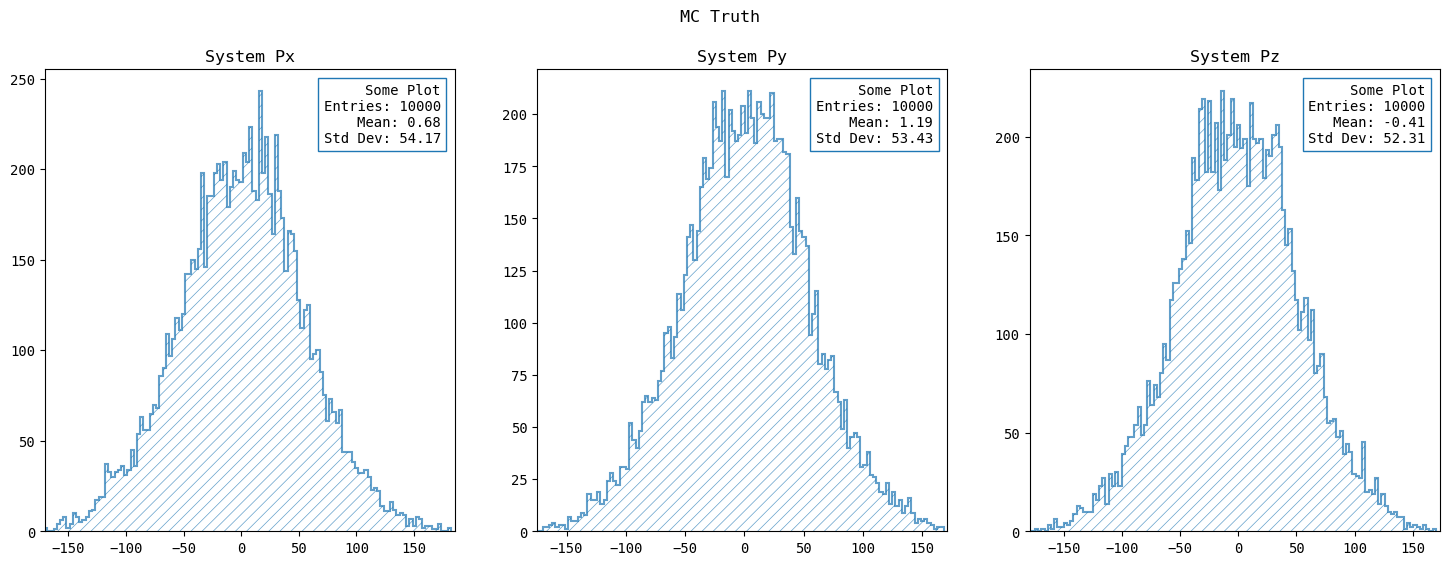

In [6]:
length = 10000
pTruth = (
    np.zeros(length),
    np.zeros(length),
    np.zeros(length)
)

for j in range(length):
    for i, qty in enumerate(["px", "py", "pz"]):
        for part in ["true_lep1", "true_lep2", "parton1", "parton2", "parton3", "parton4"]:
            pTruth[i][j] = reco[f"{part}_{qty}"][j]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("MC Truth")

plot_hist(pTruth[0], x=None, title="System Px", ax=axes[0])
plot_hist(pTruth[1], x=None, title="System Py", ax=axes[1])
plot_hist(pTruth[2], x=None, title="System Pz", ax=axes[2])

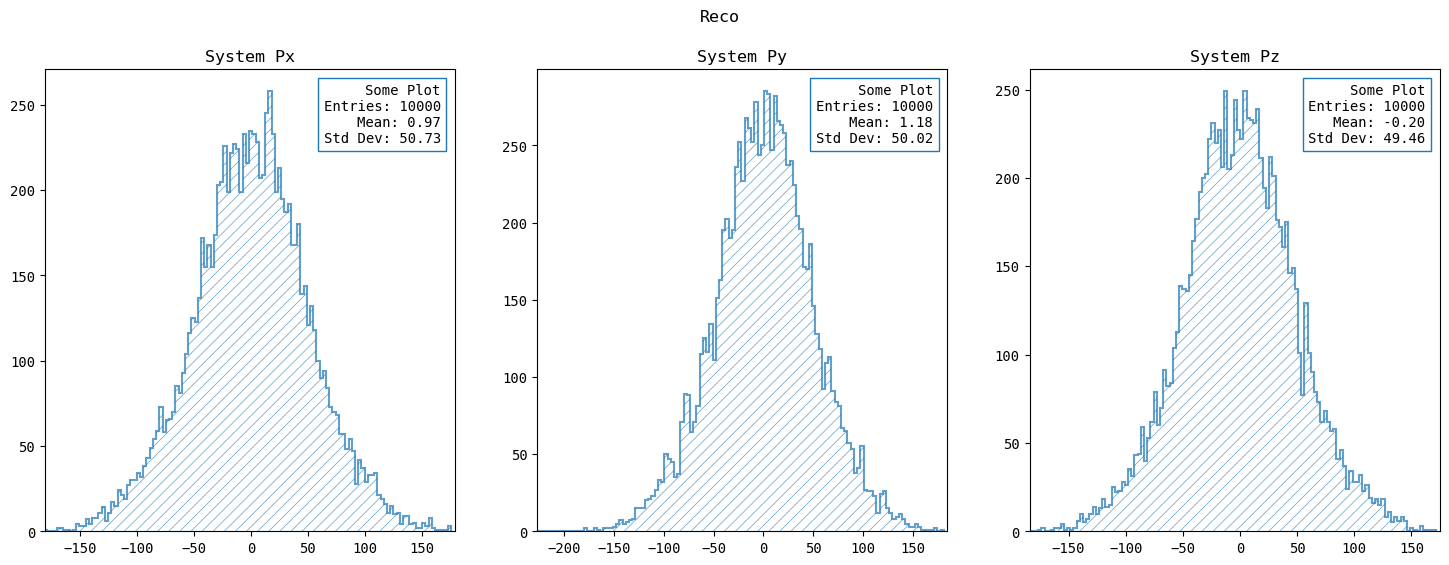

In [140]:
length = 10000
pReco = (
    np.zeros(length),
    np.zeros(length),
    np.zeros(length)
)

for j in range(length):
    for i, qty in enumerate(["px", "py", "pz"]):
        for part in ["lep1", "lep2", "jet1", "jet2", "jet3", "jet4"]:
            pReco[i][j] = reco[f"{part}_{qty}"][j]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Reco")

plot_hist(pReco[0], x=None, title="System Px", ax=axes[0])
plot_hist(pReco[1], x=None, title="System Py", ax=axes[1])
plot_hist(pReco[2], x=None, title="System Pz", ax=axes[2])

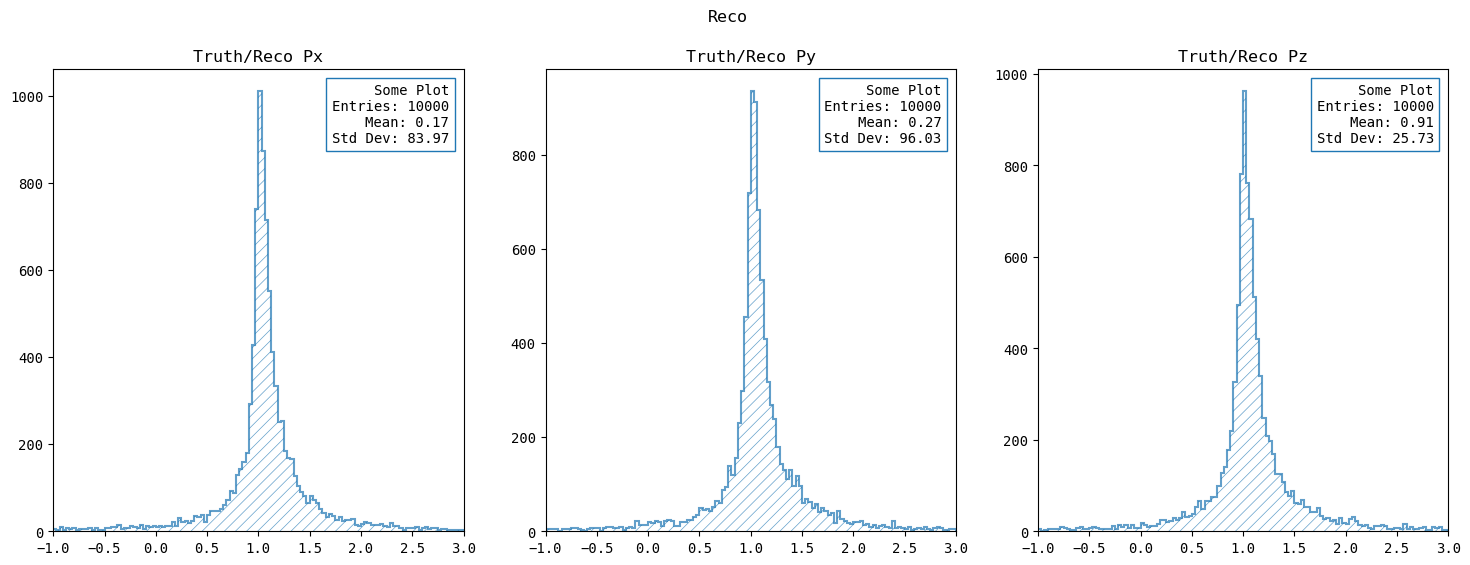

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Reco")

xlim = xlim_binning = (-1,3)
plot_hist(pTruth[0]/pReco[0], x=None, title="Truth/Reco Px", ax=axes[0], xlim_binning=xlim_binning, xlim=xlim)
plot_hist(pTruth[1]/pReco[1], x=None, title="Truth/Reco Py", ax=axes[1], xlim_binning=xlim_binning, xlim=xlim)
plot_hist(pTruth[2]/pReco[2], x=None, title="Truth/Reco Pz", ax=axes[2], xlim_binning=xlim_binning, xlim=xlim)

MC Truth: Kinematics solving (delta dist's for conservation of 4 momentum)

In [133]:
event_idx = 0

target, guess = construct_func(get_kinematics_tf(reco, event_idx, 0), constants, get_corrections(reco, event_idx), 1)

guess

(33.027374, 158.07144, 81.69484, 69.69326)

In [127]:
target(guess)

[-2.2888184e-05,
 7.940122841887387e-06,
 1.1913830810783566e-06,
 -5.009490546825646e-07]

In [16]:
# Take measured energies as initial guess
# Idea: Guess sqrt(s) with measured energies?

res = least_squares(target, guess, bounds = (
    (0, 0, 0, 0),
    (500, 500, 500, 500)
))
res.x

array([ 33.02738373, 158.07144883,  81.69485076,  69.69325516])

In [17]:
target(res.x)

[-5.258016244624741e-13,
 5.115907697472721e-13,
 2.2026824808563106e-13,
 -4.796163466380676e-14]

Reco Test: Kinematics solving

In [143]:
event_idx = 10

target, guess = construct_func(get_kinematics_tf(reco, event_idx), constants, get_corrections(reco, event_idx))
target(guess)

[3.3765068, 4.6232815625379935, -4.379942544519043, -2.210214746024553]

In [71]:
500 - abs( np.sum(qties[0]) + np.sum(qties[1]) + np.sum(qties[2]))

498.4121551513672

In [67]:
reco["true_lep1_e"][event_idx] + reco["true_lep2_e"][event_idx] + reco["parton1_e"][event_idx] + reco["parton2_e"][event_idx] + reco["parton3_e"][event_idx] + reco["parton4_e"][event_idx]

462.00082

In [65]:
res = least_squares(target, guess, bounds = (
    (0, 0, 0, 0),
    (500, 500, 500, 500)
))
res.x

array([146.3459645 ,  56.01399325,  84.208614  ,  69.88899356])

In [149]:
from itertools import permutations
from scipy.optimize import least_squares

ETF_coeffs_sig = [
    (-1.33850763, 6.35057887),
    (-1.36678223, 6.4788703 ),
    (-1.42685018, 6.48213426),
    (-1.20858859, 6.40604084)
]

ETF_coeffs_bkg = [
    (-0.21426421, 5.4111742 ),
    (-0.07810281, 5.41453075),
    (-1.30328320, 6.58035589),
    (-1.23814498, 6.50253684)
]

constants["prob_norm"] = 1/(2**20)/(pi**14)

def lorentz(x, x0, gamma):
    return 1/(pi*gamma*(1 + ( (x-x0)/gamma )**2 ))

def P_calc(kinematics_tf, constants:dict, ETF_params:list, mode:int, corrections:dict = {}) -> float:
    energies, momenta, angles = kinematics_tf

    # Take measured energies as initial guess
    res = construct_func(kinematics_tf, constants, corrections)
    if res is None:
        return -1.
    
    target, guess = res

    #print(guess, target(guess))

    # Solve four momentum conservation
    res = least_squares(target, guess, bounds = (
        (0, 0, 0, 0),
        (500, 500, 500, 500)
    ))
    
    # Truth energies and impulses as calculated from above assumptions/fit
    masses_energies = [
        (constants["m_mu"], energies[0]),
        (constants["m_mu"], energies[1]),
        (constants["m_b"], res.x[0]),
        (constants["m_b"], res.x[1]),
        (constants["m_b"], res.x[2]),
        (constants["m_b"], res.x[3])
    ]
    
    if False:
        print([
            (res.x[0], energies[2]),
            (res.x[1], energies[3]),
            (res.x[2], energies[4]),
            (res.x[3], energies[5])
        ])
    
    # Construct parton impulses from solved energies and take muon energy+angles(momenta) as well measured; i.e. all properties well measured
    kinematics_me = []
    for i in range(6):
        # Infer rho_mu from energy or directly from measurement?
        # Here, assume energy is better measured than magnitude of impulse
        m, E = masses_energies[i]
        
        rho   = sqrt(E**2 - m**2)
        theta = angles[i][0]
        phi   = angles[i][1]
        
        px = rho*sin(theta)*cos(phi)
        py = rho*sin(theta)*sin(phi)
        pz = rho*cos(theta)
        
        kinematics_me.append(E)
        kinematics_me.append(px)
        kinematics_me.append(py)
        kinematics_me.append(pz)

    # Calculate ME**2
    me_squared = (calc_zhh if mode == 1 else calc_zzh)(kinematics_me)[0]
    
    ETFs = np.zeros(24) # energy transfer functions
    perms_part = list(permutations([0, 1, 2, 3]))
    j = 0

    for perm_part in perms_part:
        ETF = 0
        
        #E_jets  = np.array([energies[2+i] for i in range(4)])
        #E_parts = np.array([res.x[perm_part[i]] for i in range(4)])
        
        #E_diffs  = E_jets - E_parts
        
        #x0 = ETF_params[perm_part[i]]
        
        ETFs_perm = np.zeros(4)
        for i in range(4):
            E_jet  = energies[2+i]
            E_part = res.x[perm_part[i]]
            ETFs_perm[i] = lorentz(E_jet - E_part, *ETF_params[perm_part[i]])
            
        ETFs[j] = np.prod(ETFs_perm)
        j += 1
    
    return constants["prob_norm"]/constants["sigma_sig_tot" if mode == 1 else "sigma_bkg_tot"]*me_squared*1/24*ETFs.sum()
    
def P_sig(kinematics_tf, constants:dict, ETF_params:list, corrections:dict = {}) -> float:
    return P_calc(kinematics_tf, constants, ETF_params, 1, corrections)

def P_bkg(kinematics_tf, constants:dict, ETF_params:list, corrections:dict = {}) -> float:
    return P_calc(kinematics_tf, constants, ETF_params, 0, corrections)

event_idx = 10
use_reco  = 1

In [150]:
P_sig(get_kinematics_tf(reco, event_idx, use_reco), constants, ETF_coeffs_sig) # get_corrections(reco, event_idx)

1.045446634803056e-13

In [151]:
P_bkg(get_kinematics_tf(reco, event_idx, use_reco), constants, ETF_coeffs_bkg)

1.045446634803056e-13

In [1]:
length = 1000

P_sigs = np.zeros(2*length)
P_bkgs = np.zeros(2*length)

for i in tqdm(range(2*length)):
    kin  = get_kinematics_tf(reco, i, 0)
    corr = get_corrections(reco, i)
    
    P_sigs[i] = P_sig(kin, constants, ETF_coeffs_sig, corr)
    P_bkgs[i] = P_bkg(kin, constants, ETF_coeffs_bkg, corr)

NameError: name 'np' is not defined

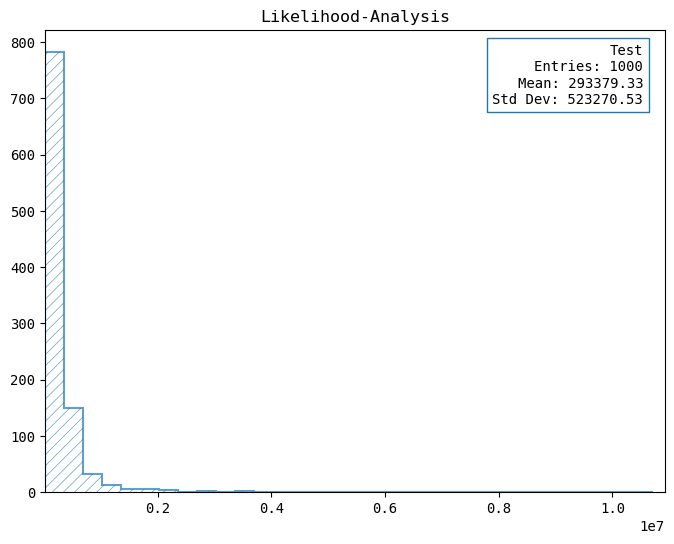

In [223]:
plot_hist(P_sigs/P_bkgs, x="Test", bins=32)

In [323]:
c = root_to_numpy("C:\DevRepositories\MEM_HEP\compare_out.root", "dataTree", merge_with_np_array=a, join_by=["run", "event"], merge_columns=["zzh_h_e"])

('zzh_h_e', 'float32')


<Axes: xlabel='misclustering_region_icns', ylabel='count'>

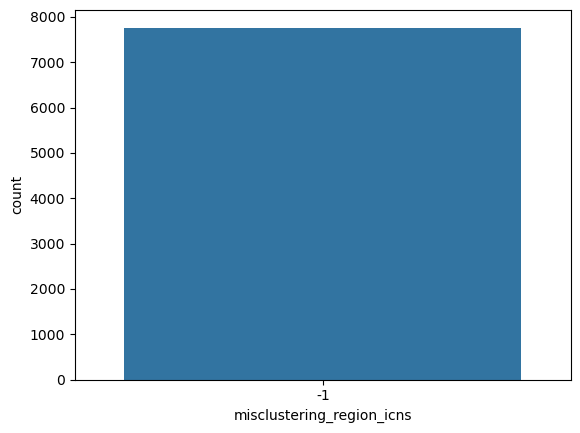

In [11]:
sns.countplot(data_reco, x="misclustering_region_icns")

<Axes: xlabel='efrac2_reco', ylabel='efrac2_true'>

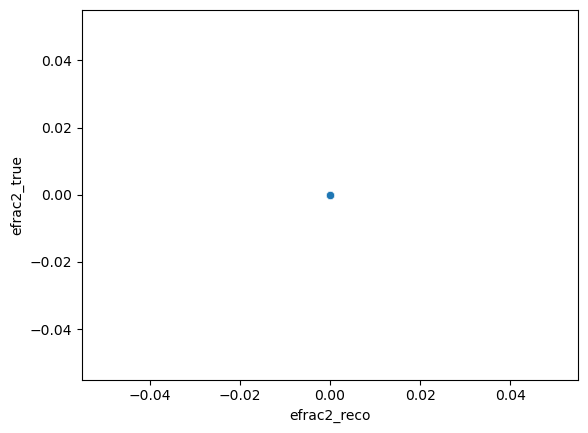

In [7]:
sns.scatterplot(data_reco, x="efrac1_reco", y="efrac1_true")

Comparing all (raw) and filtered (data) events

Text(0.5, 1.0, 'TrueJet / ZZH')

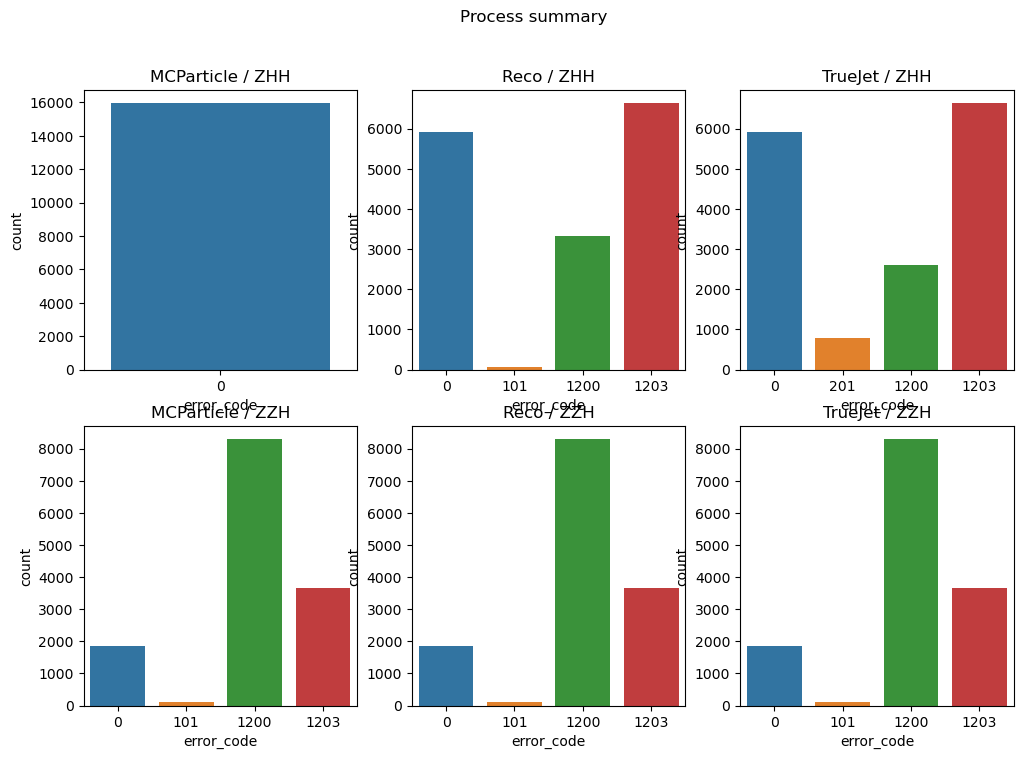

In [8]:
fig, ((ax11, ax12, ax13), (ax21, ax22, ax23)) = plt.subplots(2, 3, figsize=(12,8))
fig.suptitle("Process summary")

fig1 = sns.countplot(raw_mcparticle[raw_mcparticle["is_zhh"] == 1], x="error_code", ax=ax11)
fig1.set_title("MCParticle / ZHH")

fig2 = sns.countplot(raw_reco[raw_reco["is_zhh"] == 1], x="error_code", ax=ax12)
fig2.set_title("Reco / ZHH")

fig3 = sns.countplot(raw_truejet[raw_truejet["is_zhh"] == 1], x="error_code", ax=ax13)
fig3.set_title("TrueJet / ZHH")

fig4 = sns.countplot(raw_reco[raw_reco["is_zzh"] == 1], x="error_code", ax=ax21)
fig4.set_title("MCParticle / ZZH")

fig5 = sns.countplot(raw_reco[raw_reco["is_zzh"] == 1], x="error_code", ax=ax22)
fig5.set_title("Reco / ZZH")

fig6 = sns.countplot(raw_reco[raw_reco["is_zzh"] == 1], x="error_code", ax=ax23)
fig6.set_title("TrueJet / ZZH")

<Axes: xlabel='zzh_nll', ylabel='Count'>

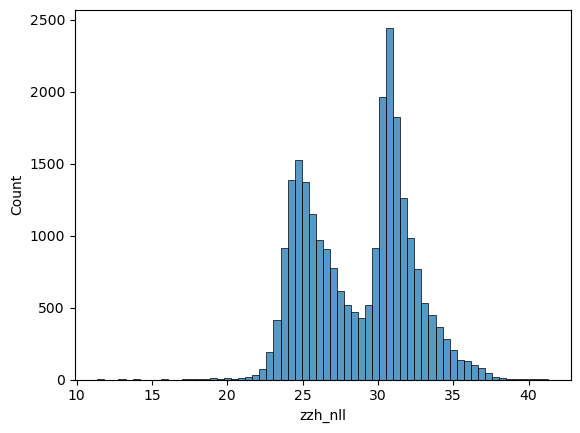

In [7]:
sns.histplot(data_mcparticle, x="zzh_nll", bins=64)

<Axes: xlabel='h1_decay_pdg', ylabel='count'>

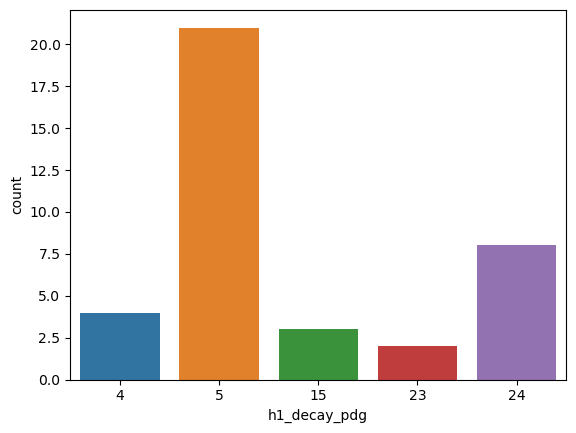

In [13]:
sns.countplot(data_mcparticle[(data_mcparticle["is_zzh"] == 1) & (data_mcparticle["error_code"] == 0)], x="h1_decay_pdg")

1. MCTruth

In [6]:
true_zzh = data_mcparticle[(data_mcparticle["is_zzh"] == 1) & (data_mcparticle["zhh_sigma"] > 0) & (data_mcparticle["zzh_sigma"] > 0)].copy()
true_zhh = data_mcparticle[(data_mcparticle["is_zhh"] == 1) & (data_mcparticle["zhh_sigma"] > 0) & (data_mcparticle["zzh_sigma"] > 0)].copy()

true_zzh.reset_index(drop=True,inplace=True)
true_zhh.reset_index(drop=True,inplace=True)

llr = combine_columns({ "zhh_llr": true_zhh["llr"], "zzh_llr": true_zzh["llr"] })

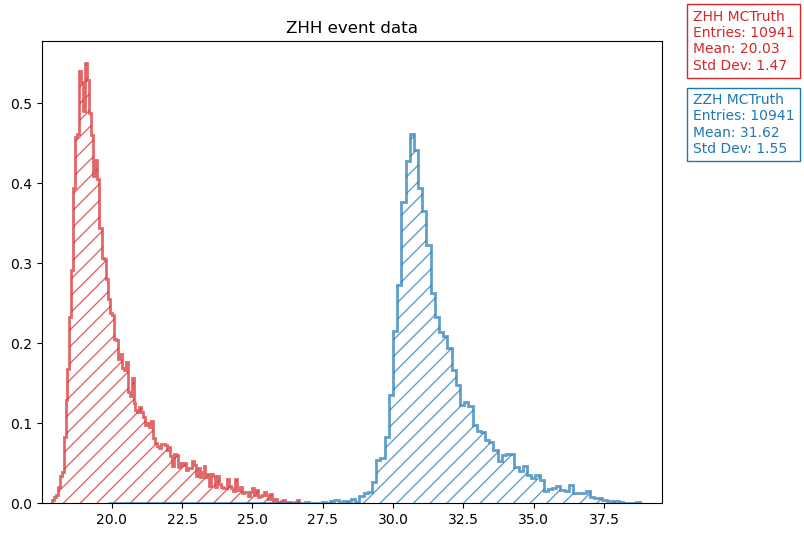

In [40]:
plot_hist(true_zhh, x = ["zhh_nll", "zzh_nll"], title="ZHH event data", normalize=True, labels=["ZHH MCTruth", "ZZH MCTruth"], xlabel="nll")

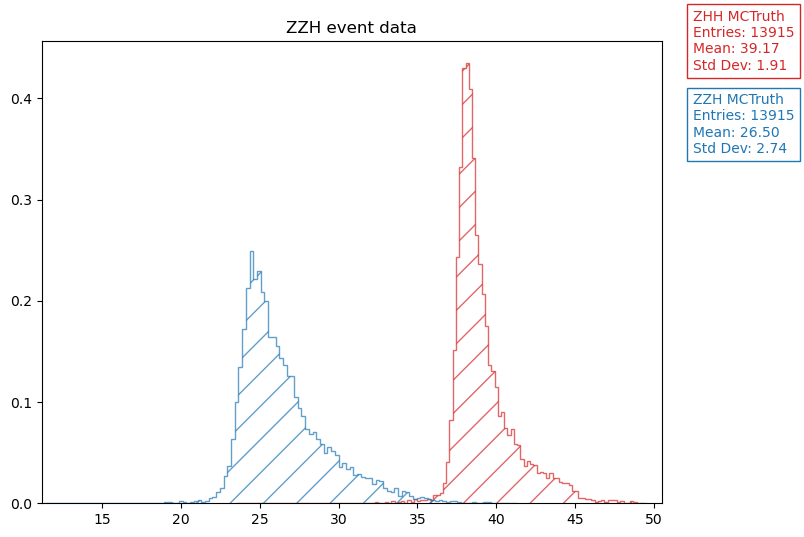

In [36]:
plot_hist(true_zzh, x = ["zhh_nll", "zzh_nll"], title="ZZH event data", normalize=True, labels=["ZHH MCTruth", "ZZH MCTruth"], xlabel="nll")

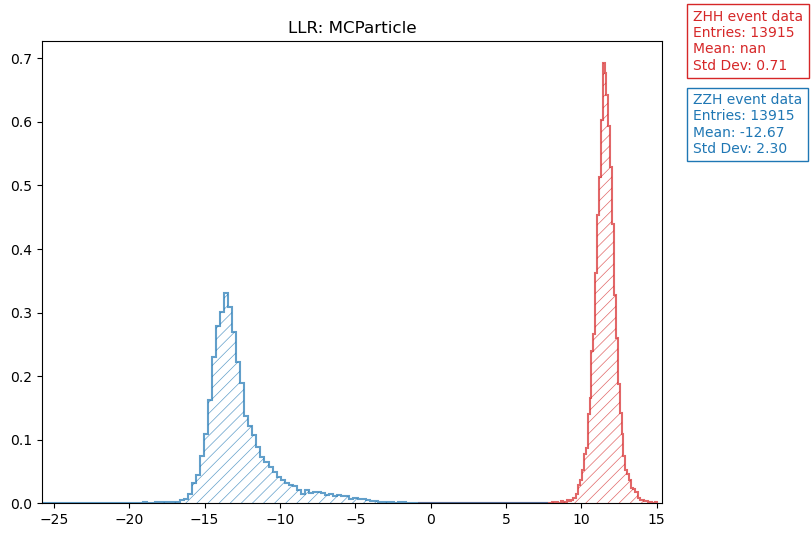

In [7]:
plot_hist(llr, x = ["zhh_llr", "zzh_llr"], labels=["ZHH event data", "ZZH event data"], title="LLR: MCParticle", normalize=True, xlabel="llr")

2. RefinedJets

In [55]:
true_zzh = data_reco[(data_reco["is_zzh"] == 1) & (data_reco["zhh_sigmalr"] > 0) & (data_reco["zzh_sigmalr"] > 0)].copy()
true_zhh = data_reco[(data_reco["is_zhh"] == 1) & (data_reco["zhh_sigmalr"] > 0) & (data_reco["zzh_sigmalr"] > 0)].copy()

true_zzh.reset_index(drop=True,inplace=True)
true_zhh.reset_index(drop=True,inplace=True)

llr = combine_columns({ "zhh_llr": true_zhh["llr"], "zzh_llr": true_zzh["llr"] })

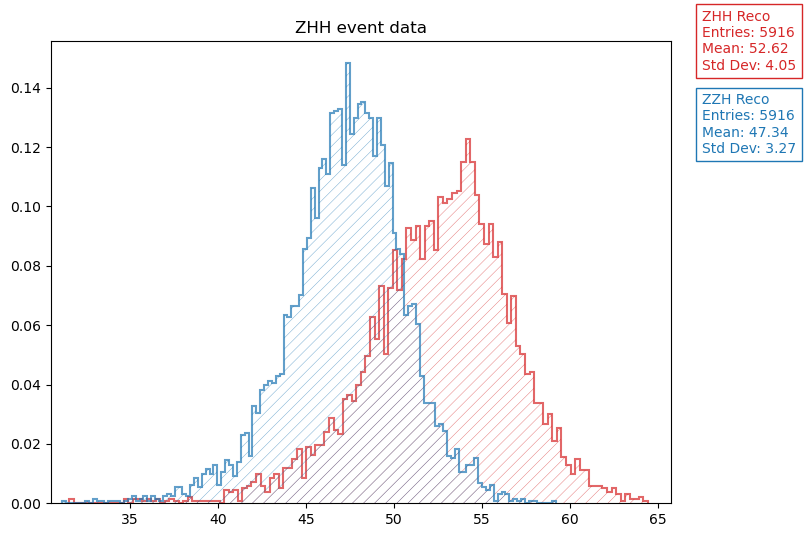

In [57]:
plot_hist(true_zhh, x = ["zhh_nll", "zzh_nll"], title="ZHH event data", normalize=True, labels=["ZHH Reco", "ZZH Reco"], xlabel="nll")

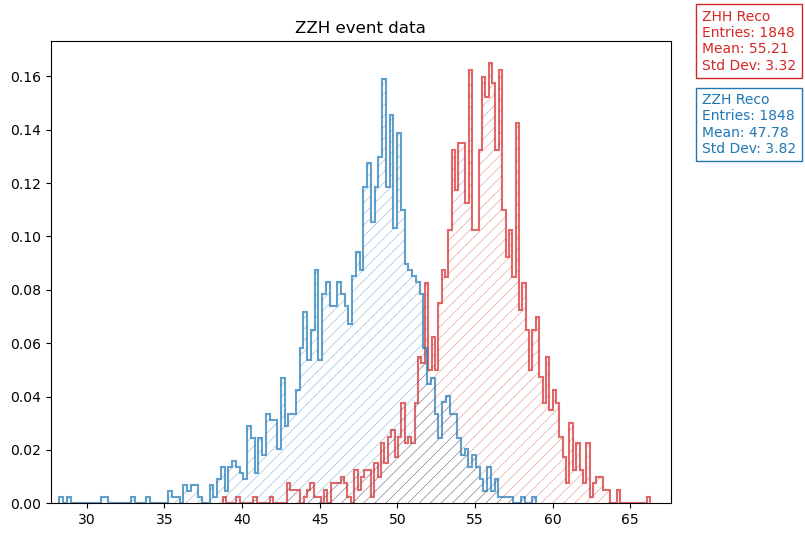

In [58]:
plot_hist(true_zzh, x = ["zhh_nll", "zzh_nll"], title="ZZH event data", normalize=True, labels=["ZHH Reco", "ZZH Reco"], xlabel="nll")

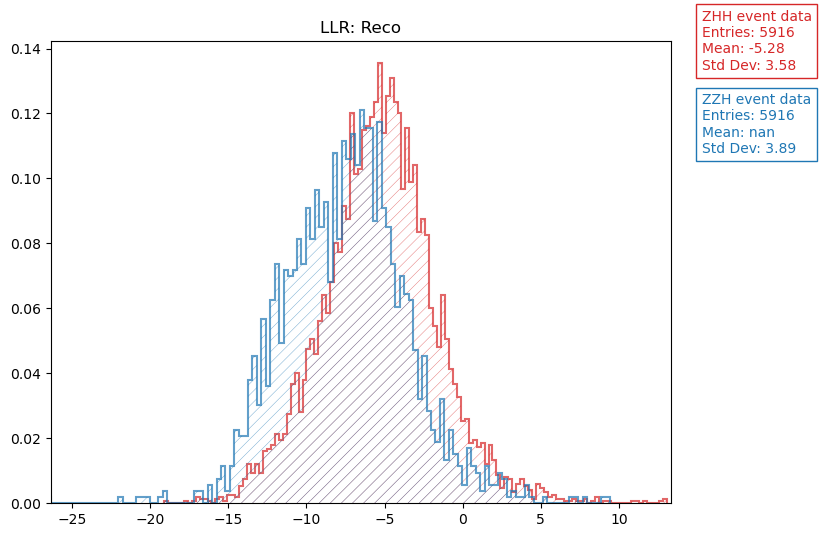

In [59]:
plot_hist(llr, x = ["zhh_llr", "zzh_llr"], labels=["ZHH event data", "ZZH event data"], title="LLR: Reco", normalize=True, xlabel="llr")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_name
Warning in <TROOT::Append>: Replacing existing TH1: ZHH event data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ZZH event data (Potential memory leak).


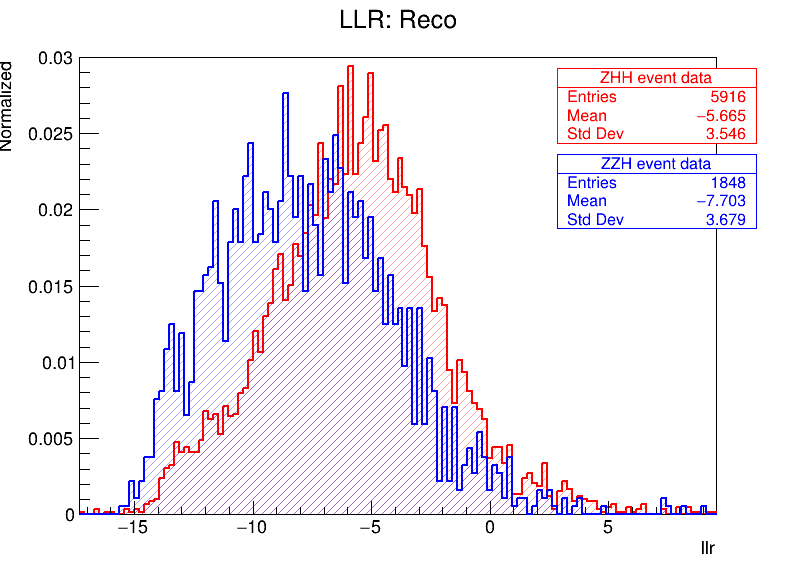

In [ ]:
plot_hist(llr, x = ["zhh_llr", "zzh_llr"], labels=["ZHH event data", "ZZH event data"], title="LLR: Reco", normalize=True, xlabel="llr")

3. TrueJet

In [60]:
true_zzh = data_truejet[(data_truejet["is_zzh"] == 1) & (data_truejet["zhh_sigmalr"] > 0) & (data_truejet["zzh_sigmalr"] > 0)].copy()
true_zhh = data_truejet[(data_truejet["is_zhh"] == 1) & (data_truejet["zhh_sigmalr"] > 0) & (data_truejet["zzh_sigmalr"] > 0)].copy()

true_zzh.reset_index(drop=True,inplace=True)
true_zhh.reset_index(drop=True,inplace=True)

llr = combine_columns({ "zhh_llr": true_zhh["llr"], "zzh_llr": true_zzh["llr"] })

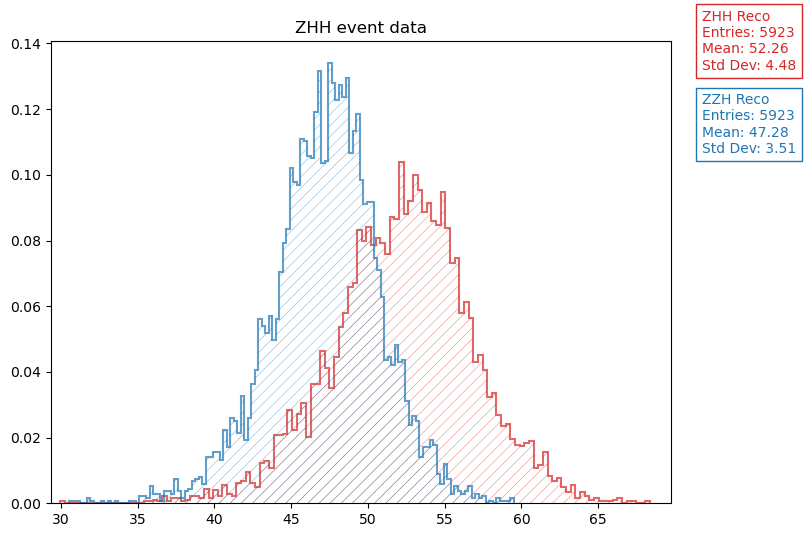

In [61]:
plot_hist(true_zhh, x = ["zhh_nll", "zzh_nll"], title="ZHH event data", normalize=True, labels=["ZHH Reco", "ZZH Reco"], xlabel="nll")

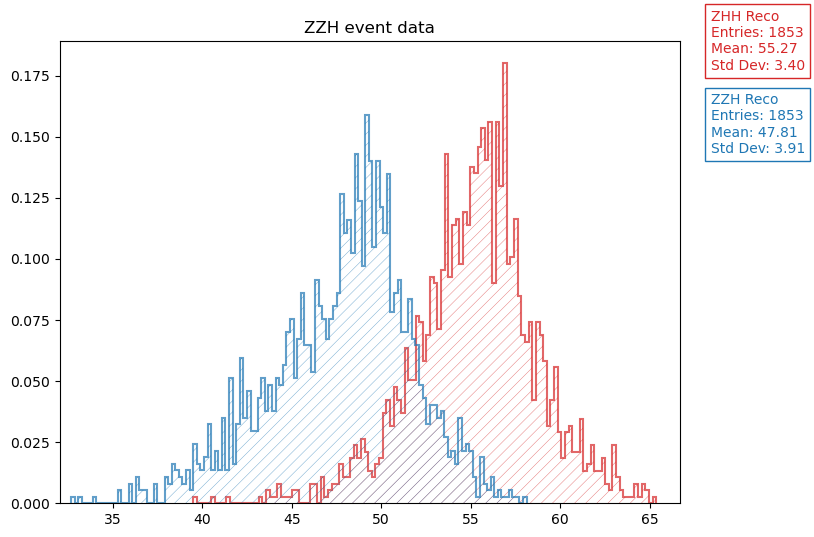

In [62]:
plot_hist(true_zzh, x = ["zhh_nll", "zzh_nll"], title="ZZH event data", normalize=True, labels=["ZHH Reco", "ZZH Reco"], xlabel="nll")

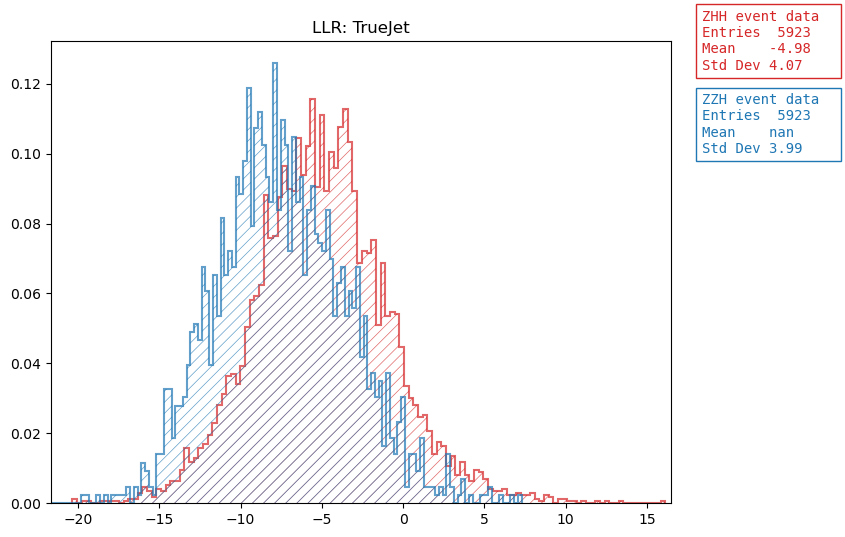

In [85]:
plot_hist(llr, x = ["zhh_llr", "zzh_llr"], labels=["ZHH event data", "ZZH event data"], title="LLR: TrueJet", normalize=True, xlabel="llr")

Region A

<Axes: xlabel='true_type', ylabel='count'>

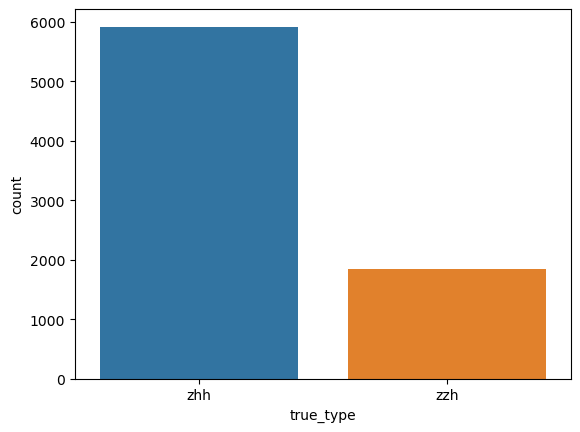

: 

In [ ]:
sns.countplot(data_reco, x="true_type")

<Axes: xlabel='misclustering_region_icns', ylabel='count'>

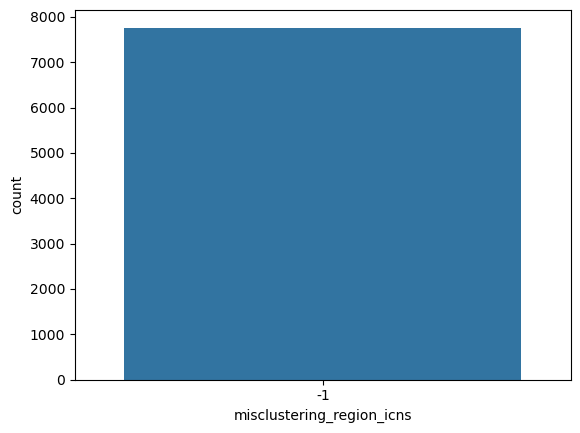

In [14]:
sns.countplot(data_reco, x="misclustering_region") # {"AA",0.}, {"AB",1.}, {"AC",2.}, {"AD",3.}, {"BB",4.}, {"BC",5.}, {"BD",6.}, {"CC",7.}, {"CD",8.}, {"DD",9.}